In [1]:
import os
import scipy
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt

[Python 3 Quick Tip: The easy way to deal with file paths on Windows, Mac and Linux](https://medium.com/@ageitgey/python-3-quick-tip-the-easy-way-to-deal-with-file-paths-on-windows-mac-and-linux-11a072b58d5f)

In [2]:
from pathlib import Path

In [3]:
data_dir = Path('../test_data/')
os.listdir(data_dir)

['dre16_2017-05-07_16-25-34.mat',
 'dre16_2017-08-04_17-45-26.mat',
 'dre16_2017-08-04_17-56-00.mat']

[scipy.io.loadmat](https://docs.scipy.org/doc/scipy/reference/generated/scipy.io.loadmat.html)

## loadmat without `squeeze_me`

In [4]:
mat_data1 = sio.loadmat(data_dir / 'dre16_2017-05-07_16-25-34.mat')

In [5]:
type(mat_data1)

dict

### Containing variables

In [6]:
for idx, key in enumerate(mat_data1.keys()):
    print(idx, key)

0 __header__
1 __version__
2 __globals__
3 header
4 dbc_Dr_00_BMSa_00_AIRN_00
5 dbc_Dr_00_BMSa_00_AIRP_01
6 dbc_Dr_00_BMSa_00_BatIbIs_02
7 dbc_Dr_00_BMSa_00_BatStatus_03
8 dbc_Dr_00_BMSa_00_BatVolIs_04
9 dbc_Dr_00_BMSa_00_PRE_05
10 dbc_Dr_00_BMSb_01_BatCellMax_00
11 dbc_Dr_00_BMSb_01_BatCellMin_01
12 dbc_Dr_00_BMSb_01_BatTemMax_02
13 dbc_Dr_00_BMSb_01_BatTemMean_03
14 dbc_Dr_00_BMSb_01_BatTemMim_04
15 dbc_Dr_00_CCFa_02_ACC1_00
16 dbc_Dr_00_CCFa_02_ACC2_01
17 dbc_Dr_00_CCFa_02_Brake1_02
18 dbc_Dr_00_CCFa_02_Brake2_03
19 dbc_Dr_00_CCFb_03_ax_02
20 dbc_Dr_00_CCFb_03_ay_03
21 dbc_Dr_00_CCFb_03_OS_00
22 dbc_Dr_00_CCFb_03_STR_01
23 dbc_Dr_00_CCFc_04_az_00
24 dbc_Dr_00_CCFc_04_wx_01
25 dbc_Dr_00_CCFc_04_wy_02
26 dbc_Dr_00_CCFc_04_wz_03
27 dbc_Dr_00_CCFd_05_LinFL_00
28 dbc_Dr_00_CCFd_05_LinFR_01
29 dbc_Dr_00_CCFd_05_LinRL_02
30 dbc_Dr_00_CCFd_05_LinRR_03
31 dbc_Dr_00_DB_06_DB_Preserved_00
32 dbc_Dr_00_DB_06_DB_Preserved_01
33 dbc_Dr_00_DB_06_MASK_02
34 dbc_Dr_00_DB_06_Pm_04
35 dbc_Dr_00_DB_06_

- linear acceleration

    - `dbc_Dr_00_CCFb_03_ax_02`
    - `dbc_Dr_00_CCFb_03_ay_03`

- rotation velocity
    
    - `dbc_Dr_00_CCFc_04_wz_03`

In [7]:
ax = mat_data1['dbc_Dr_00_CCFb_03_ax_02']
# print(type(ax))
# print(len(ax))
# print(type(ax[0]))
# print(len(ax[0]))
# print(type(ax[0][0]))
# print(len(ax[0][0]))
# timestamp ax[0][0][6]
# plt.plot(ax[0][0][6])
# len(ax[0][0][6]) -> 2376
# ax[0][0][7][0][0][0]
# len(ax[0][0][7][0][0][0]) -> 2376
time = ax[0][0][6]
val = ax[0][0][7][0][0][0]

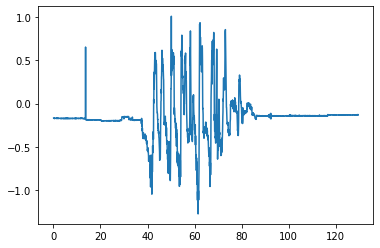

In [8]:
plt.plot(time, val)

In [9]:
wz = mat_data1['dbc_Dr_00_CCFc_04_wz_03']

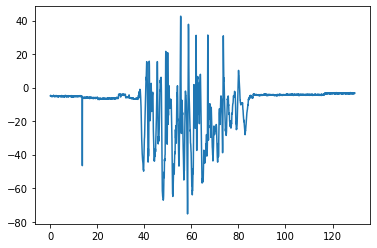

In [10]:
time = wz[0][0][6]
val = wz[0][0][7][0][0][0]
plt.plot(time, val)

In [14]:
def plot_value(
    mat_data: dict, 
    vars: list, 
    xlims = None,
    ylims = None,
    ylabel = None,
    title = None,
    fig_sz: tuple = (8, 3),
    style=None,
) -> None:
    if style is None:
        plt.style.use('ggplot')
    fig, ax = plt.subplots(figsize=fig_sz)
    for var in vars:
        var_data = mat_data[var]
        time = var_data[0][0][6]
        vals = var_data[0][0][7][0][0][0]
        var_label = var.split('_')[-2]
        ax.plot(time, vals, label=var_label)
    ax.legend()
    ax.set_xlabel("Time (s)")
    
    if xlims is not None:
        ax.set_xlim(xlims)
    if ylims is not None:
        ax.set_ylim(ylims)
    if title is not None:
        ax.set_title(title)
    if ylabel is not None:
        ax.set_ylabel(ylabel)
    
    fig.set_dpi(150.0)
    fig.tight_layout()
    plt.show() 

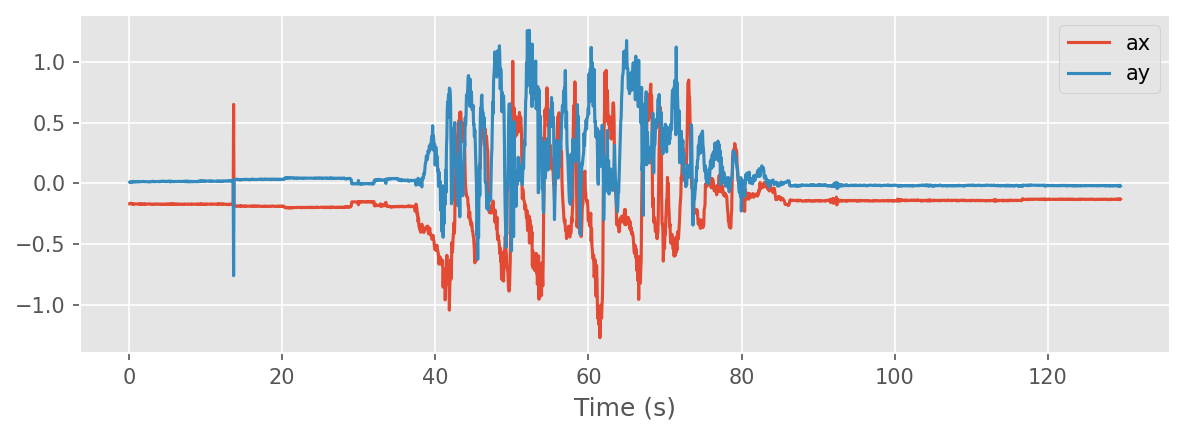

In [15]:
vars = ['dbc_Dr_00_CCFb_03_ax_02', 'dbc_Dr_00_CCFb_03_ay_03']
plot_value(mat_data = mat_data1, vars=vars)

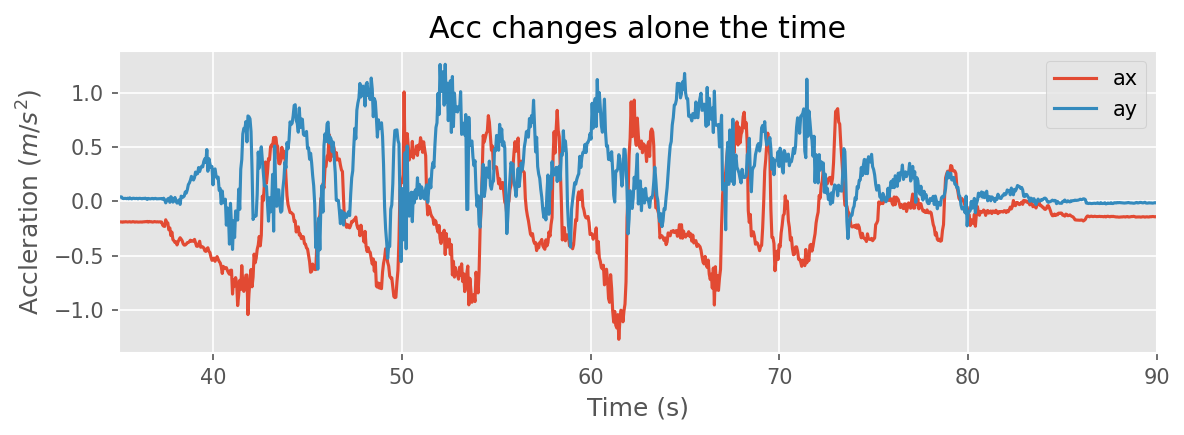

In [16]:
vars = ['dbc_Dr_00_CCFb_03_ax_02', 'dbc_Dr_00_CCFb_03_ay_03']
plot_value(
    mat_data = mat_data1, 
    vars=vars, 
    xlims=[35,90],
    title = 'Acc changes alone the time',
    ylabel = 'Accleration ($m/s^2$)',
)

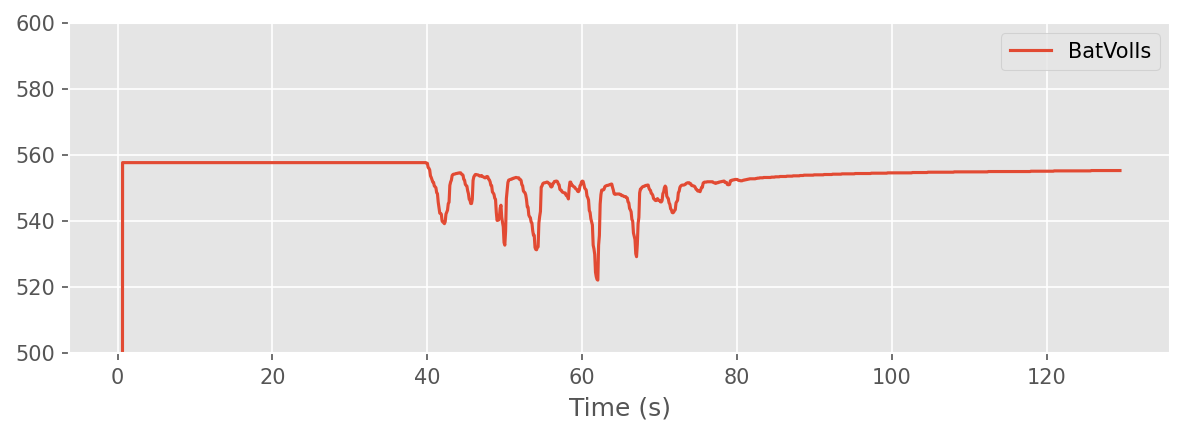

In [17]:
vars = ['dbc_Dr_00_BMSa_00_BatVolIs_04']
plot_value(
    mat_data = mat_data1,
    vars = vars,
    ylims = [500, 600]
)

## plot all variables

In [19]:
mat_data1.keys()

dict_keys(['__header__', '__version__', '__globals__', 'header', 'dbc_Dr_00_BMSa_00_AIRN_00', 'dbc_Dr_00_BMSa_00_AIRP_01', 'dbc_Dr_00_BMSa_00_BatIbIs_02', 'dbc_Dr_00_BMSa_00_BatStatus_03', 'dbc_Dr_00_BMSa_00_BatVolIs_04', 'dbc_Dr_00_BMSa_00_PRE_05', 'dbc_Dr_00_BMSb_01_BatCellMax_00', 'dbc_Dr_00_BMSb_01_BatCellMin_01', 'dbc_Dr_00_BMSb_01_BatTemMax_02', 'dbc_Dr_00_BMSb_01_BatTemMean_03', 'dbc_Dr_00_BMSb_01_BatTemMim_04', 'dbc_Dr_00_CCFa_02_ACC1_00', 'dbc_Dr_00_CCFa_02_ACC2_01', 'dbc_Dr_00_CCFa_02_Brake1_02', 'dbc_Dr_00_CCFa_02_Brake2_03', 'dbc_Dr_00_CCFb_03_ax_02', 'dbc_Dr_00_CCFb_03_ay_03', 'dbc_Dr_00_CCFb_03_OS_00', 'dbc_Dr_00_CCFb_03_STR_01', 'dbc_Dr_00_CCFc_04_az_00', 'dbc_Dr_00_CCFc_04_wx_01', 'dbc_Dr_00_CCFc_04_wy_02', 'dbc_Dr_00_CCFc_04_wz_03', 'dbc_Dr_00_CCFd_05_LinFL_00', 'dbc_Dr_00_CCFd_05_LinFR_01', 'dbc_Dr_00_CCFd_05_LinRL_02', 'dbc_Dr_00_CCFd_05_LinRR_03', 'dbc_Dr_00_DB_06_DB_Preserved_00', 'dbc_Dr_00_DB_06_DB_Preserved_01', 'dbc_Dr_00_DB_06_MASK_02', 'dbc_Dr_00_DB_06_Pm_04'

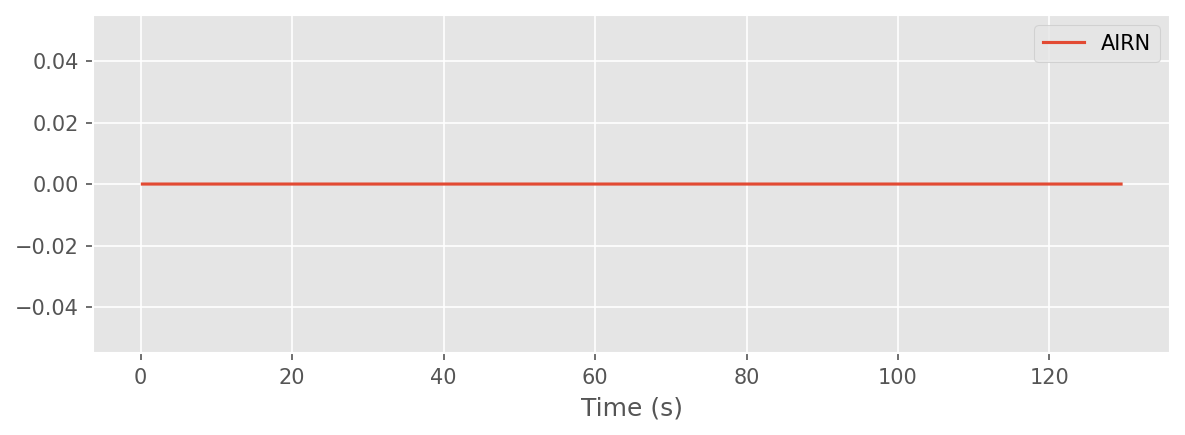

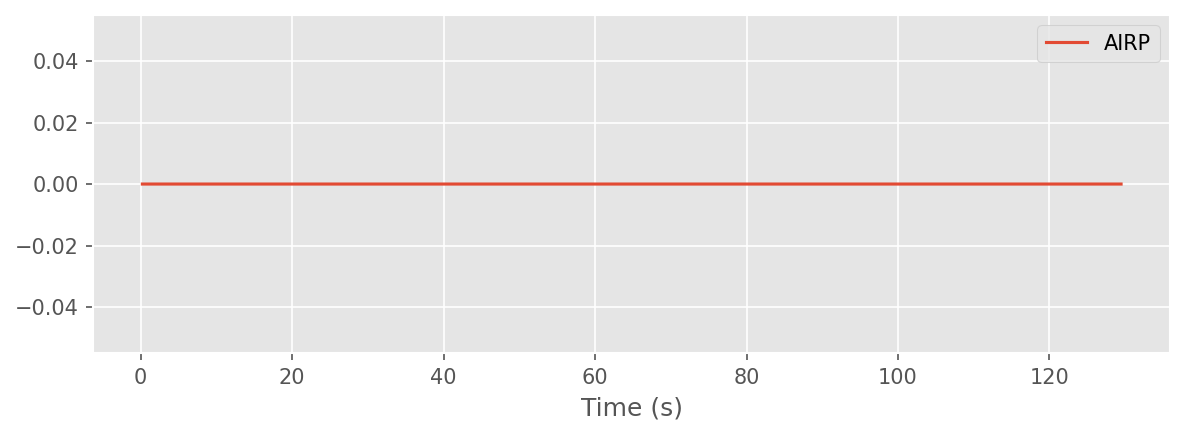

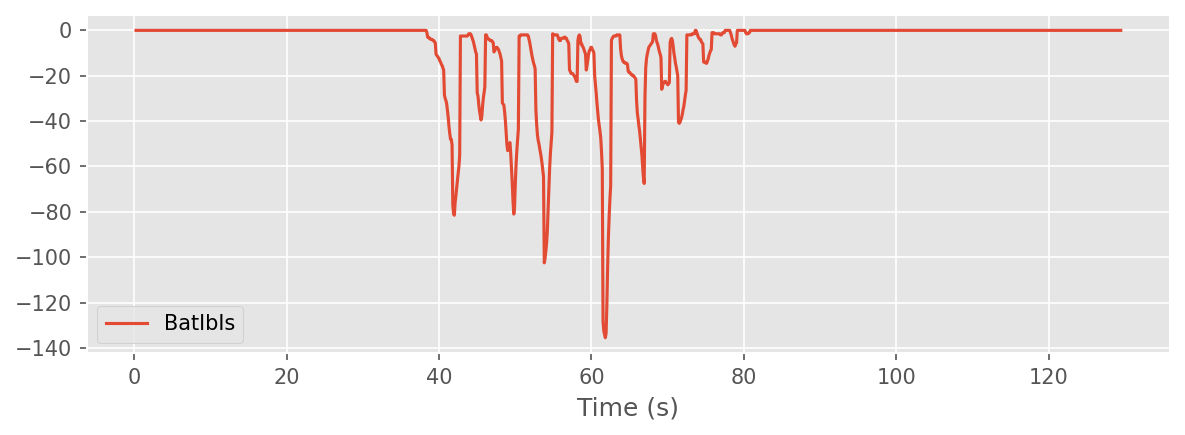

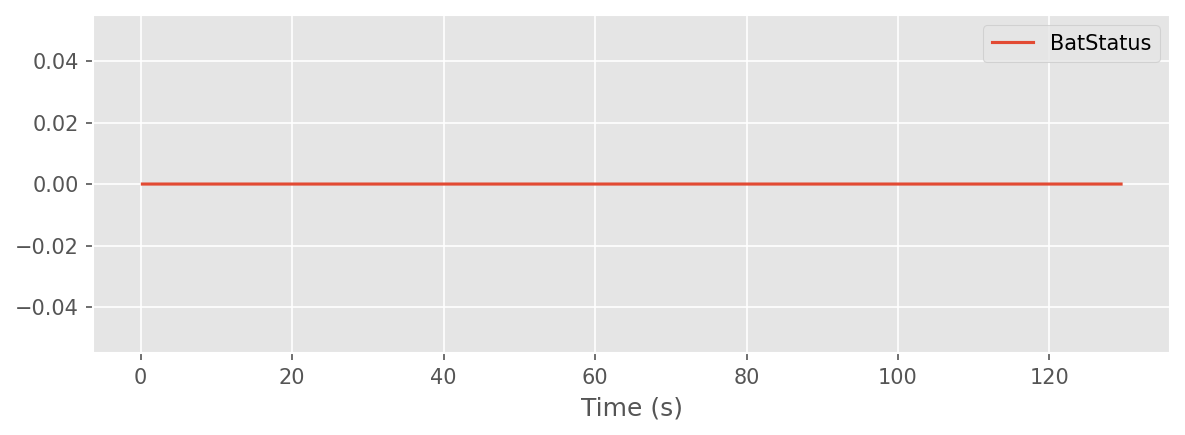

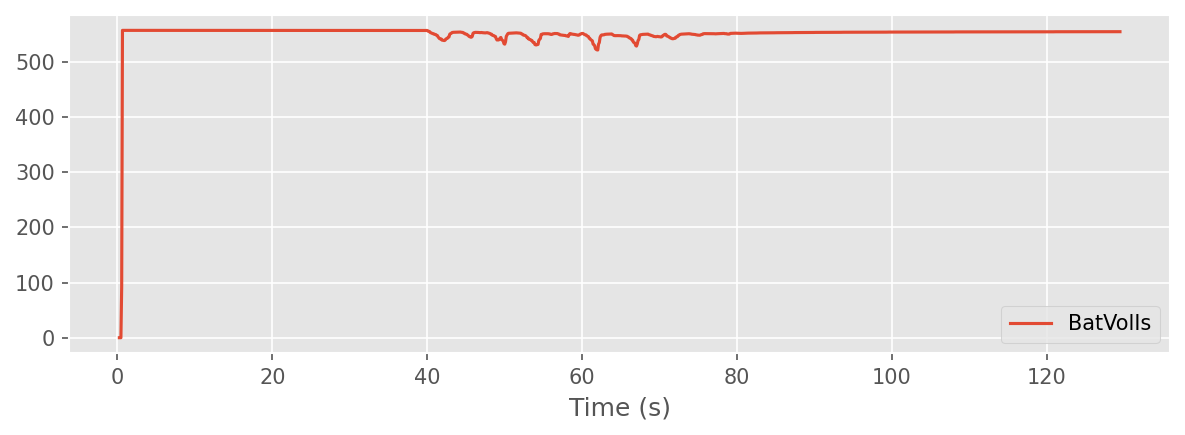

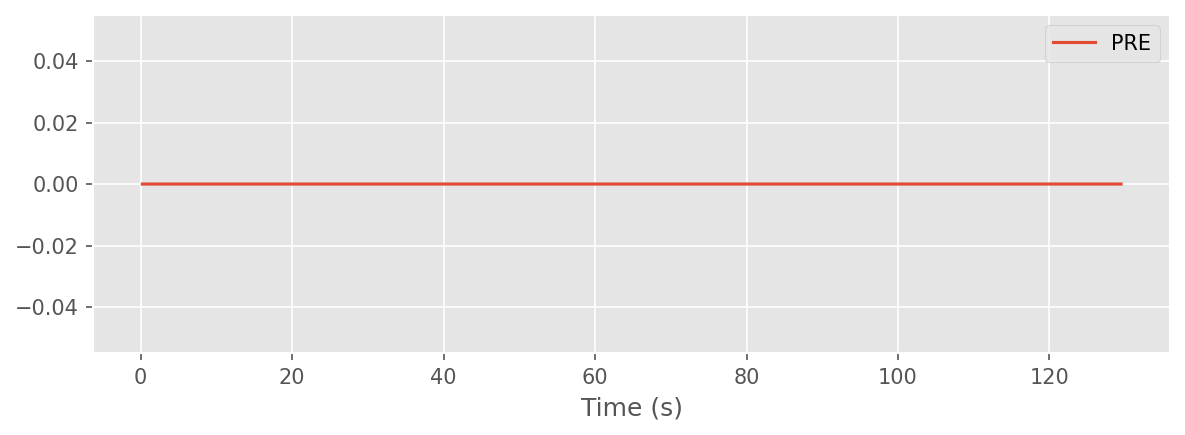

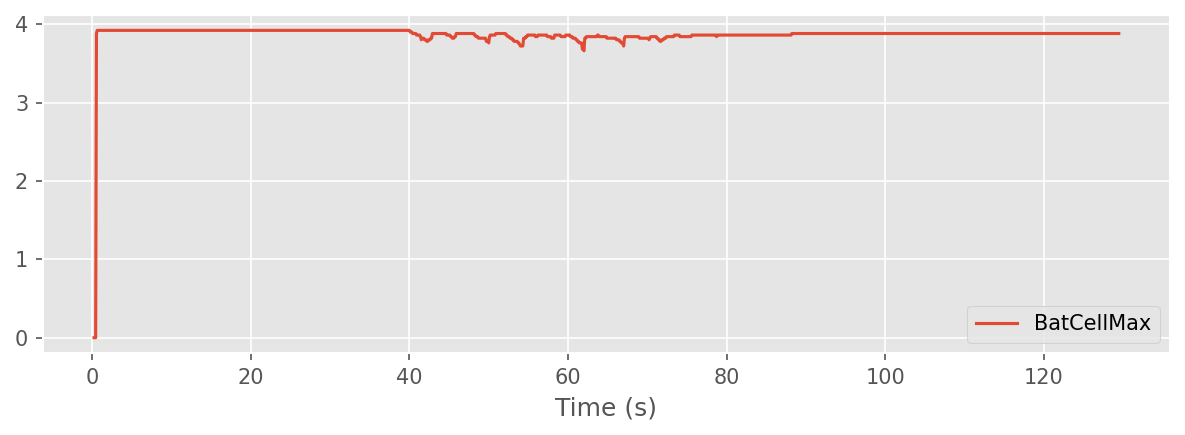

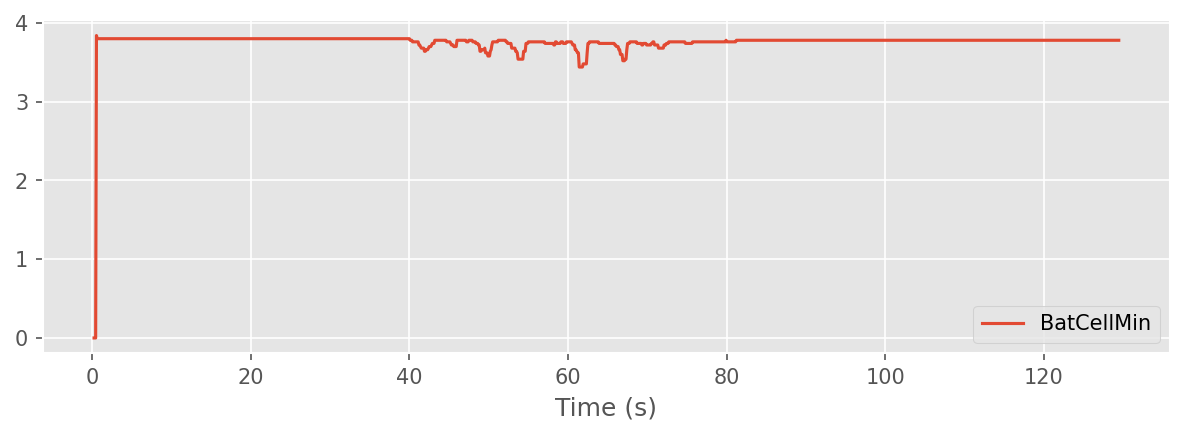

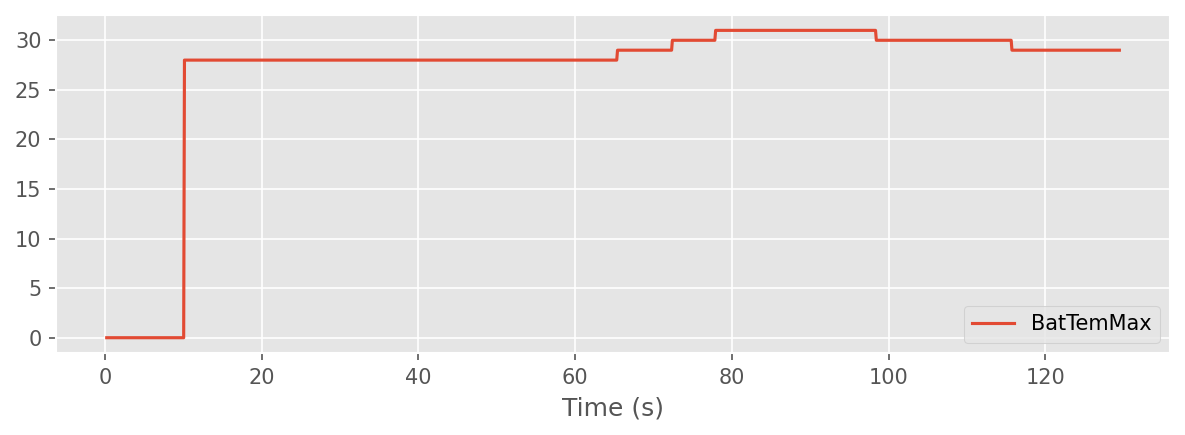

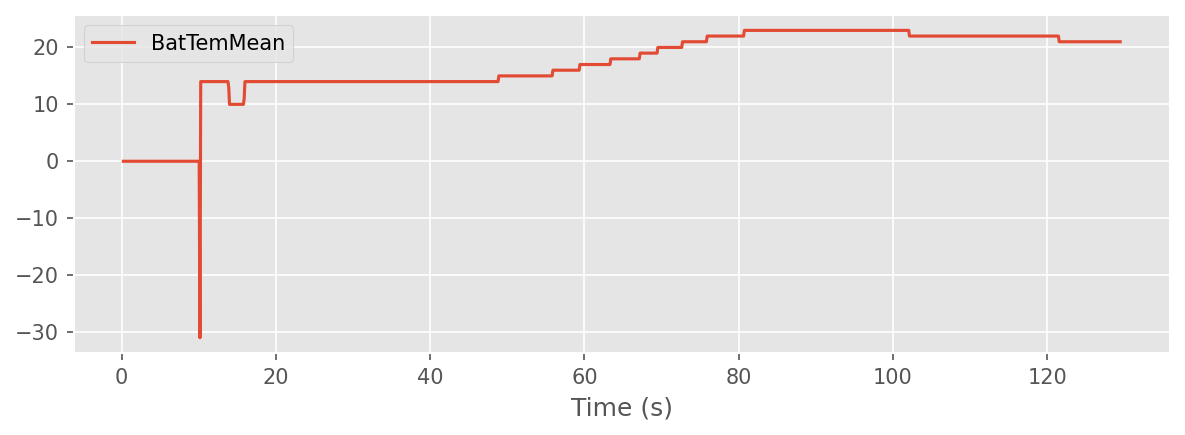

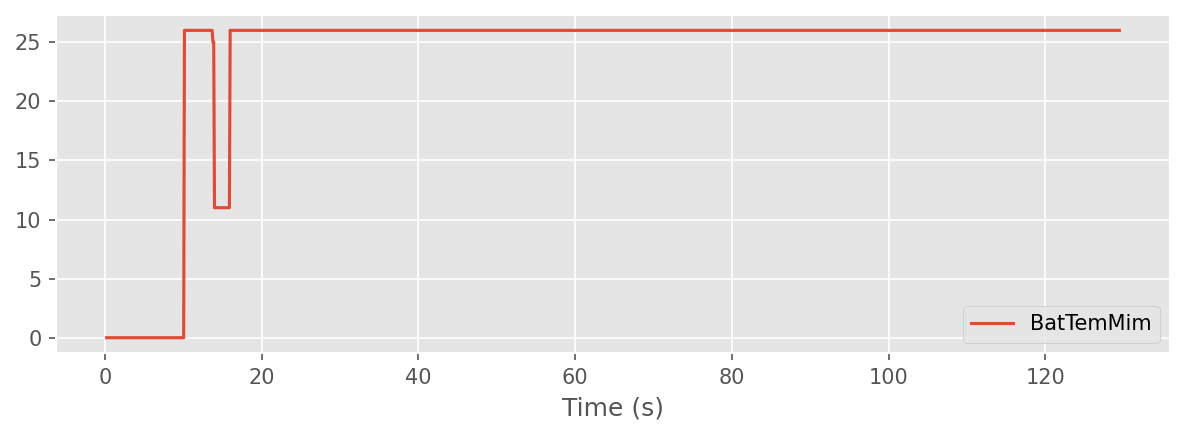

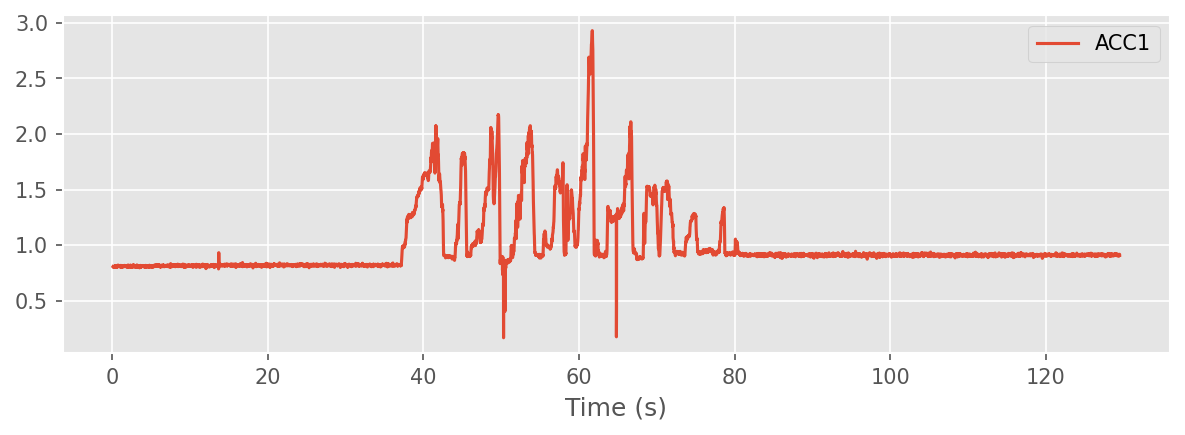

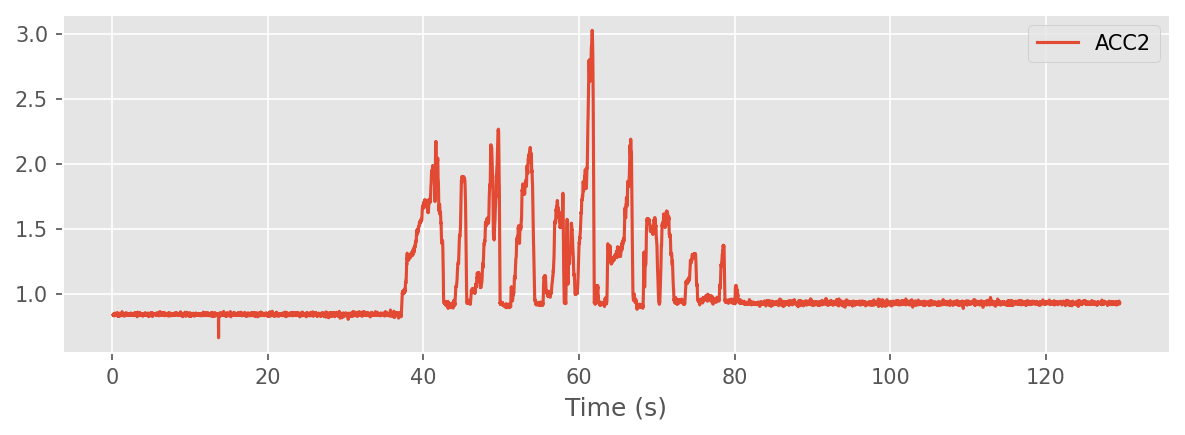

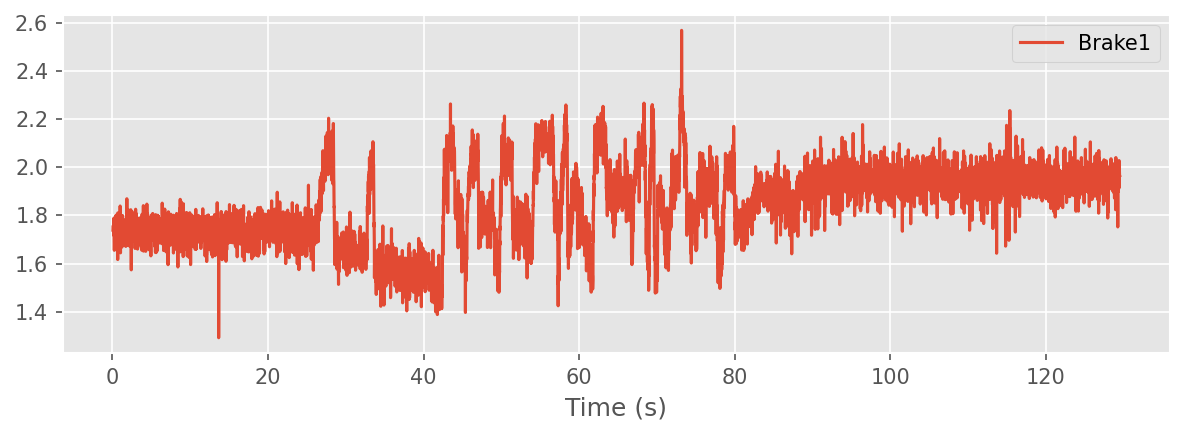

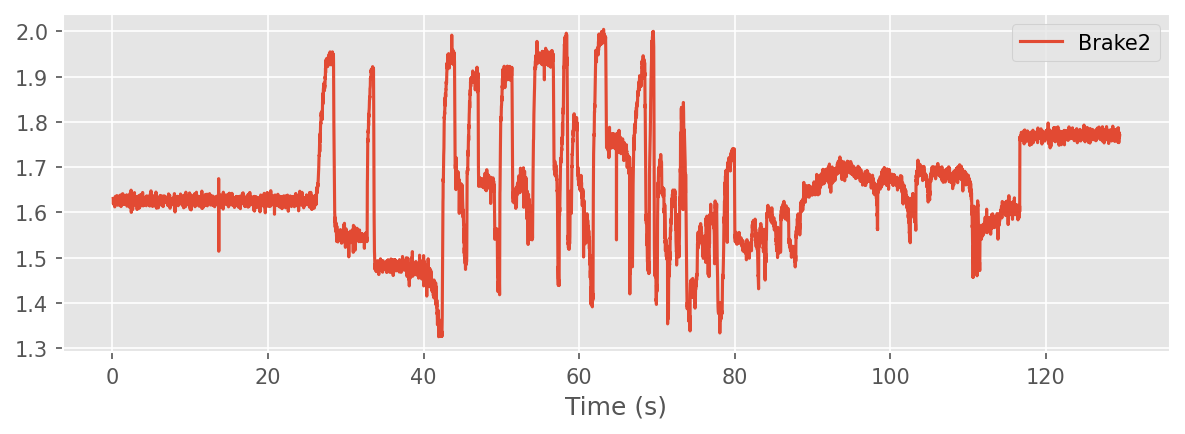

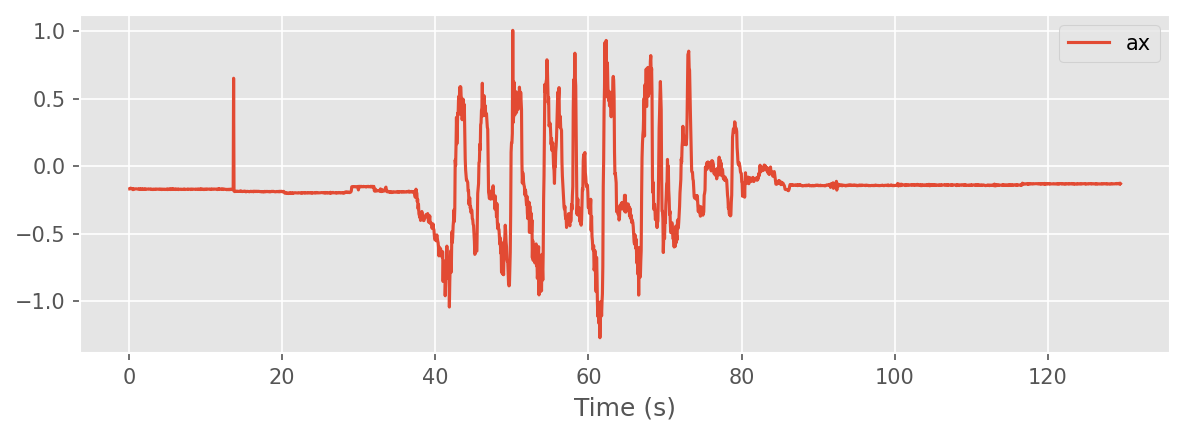

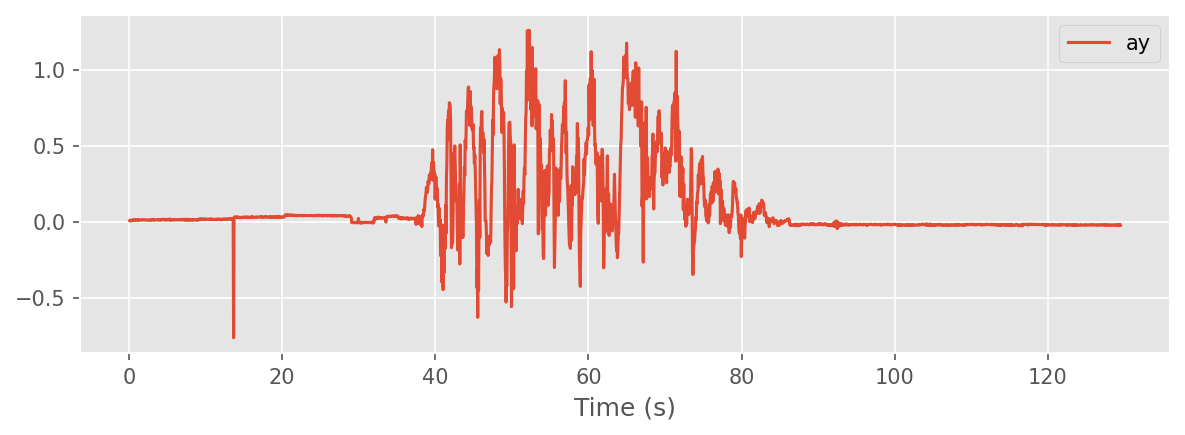

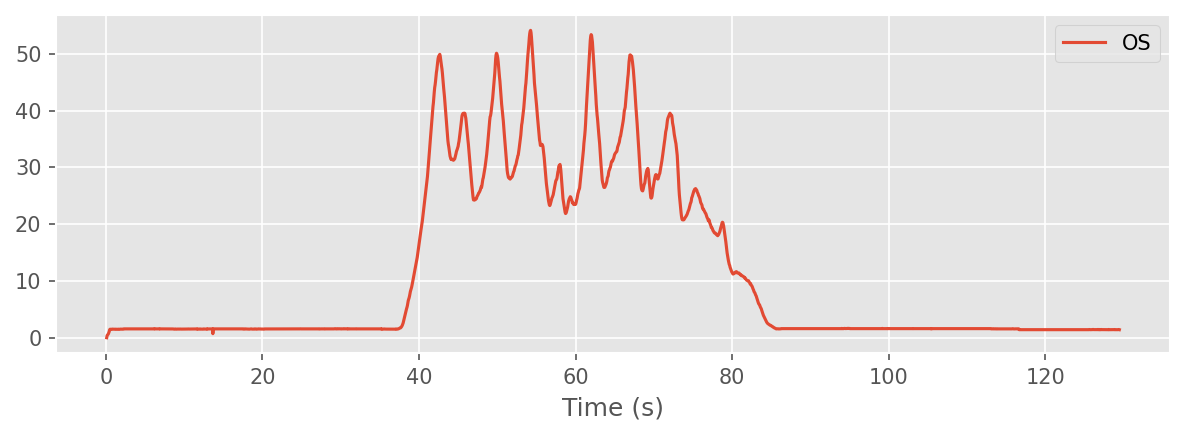

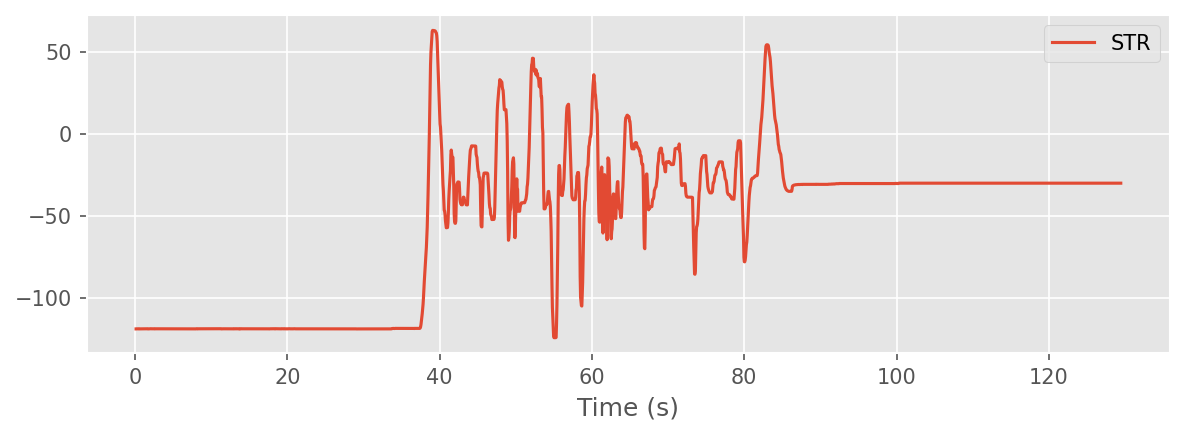

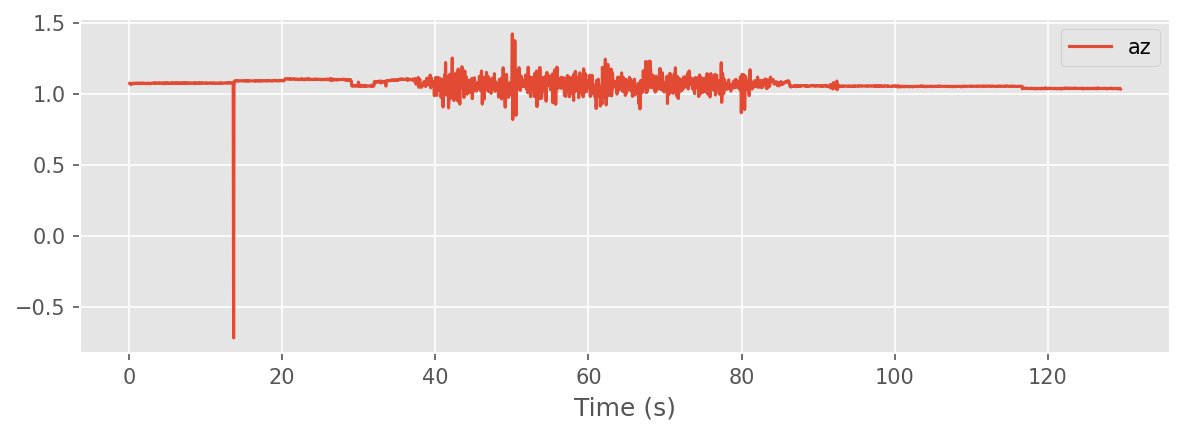

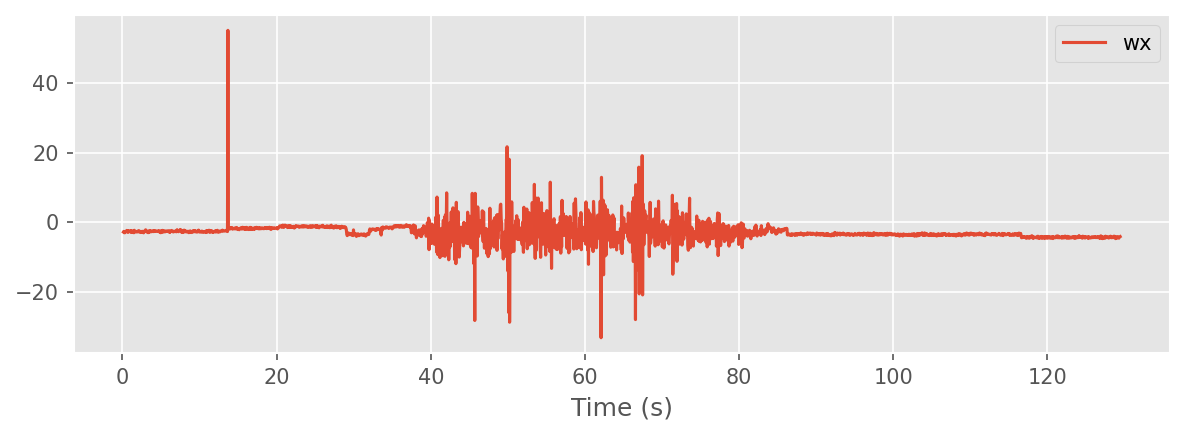

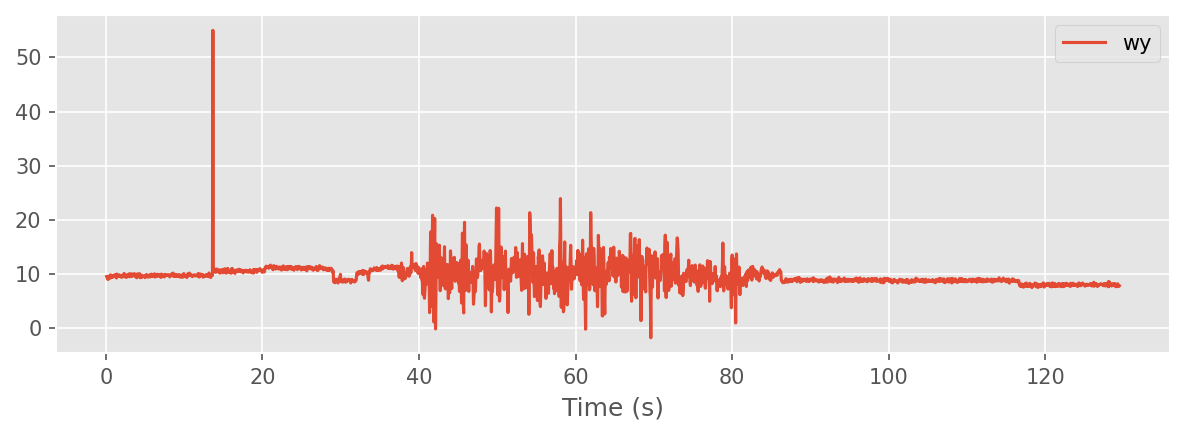

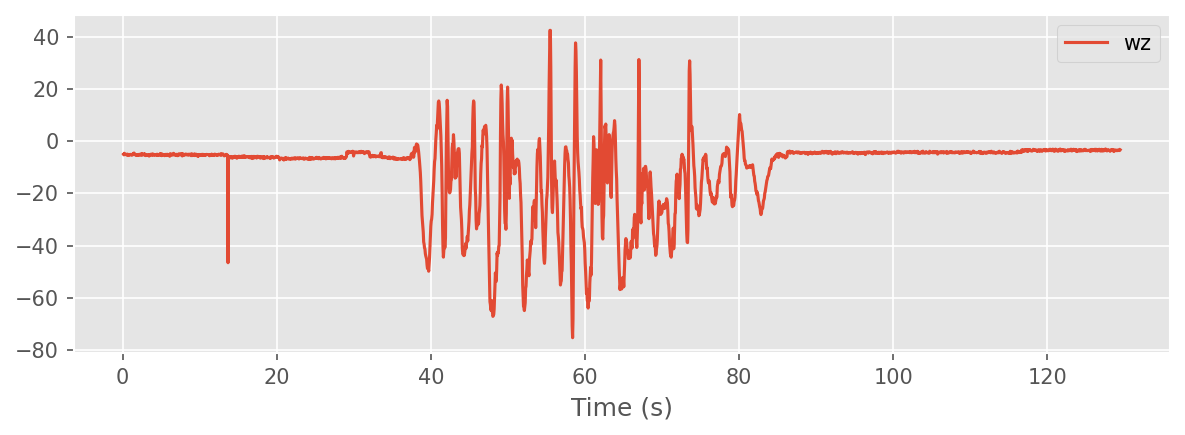

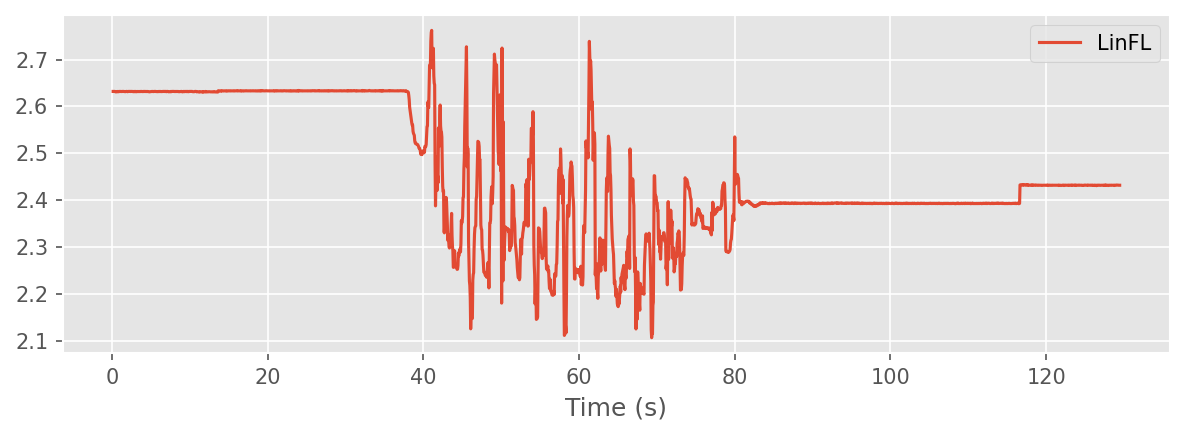

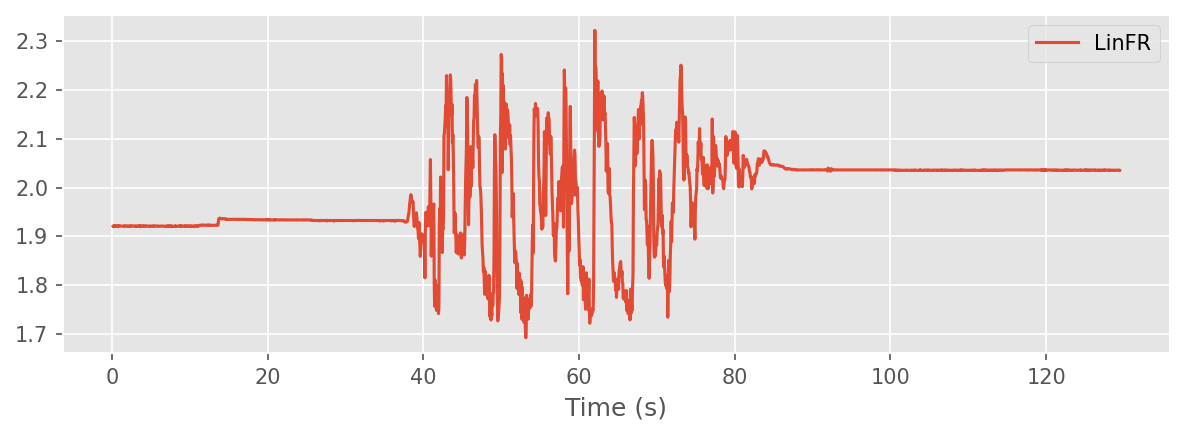

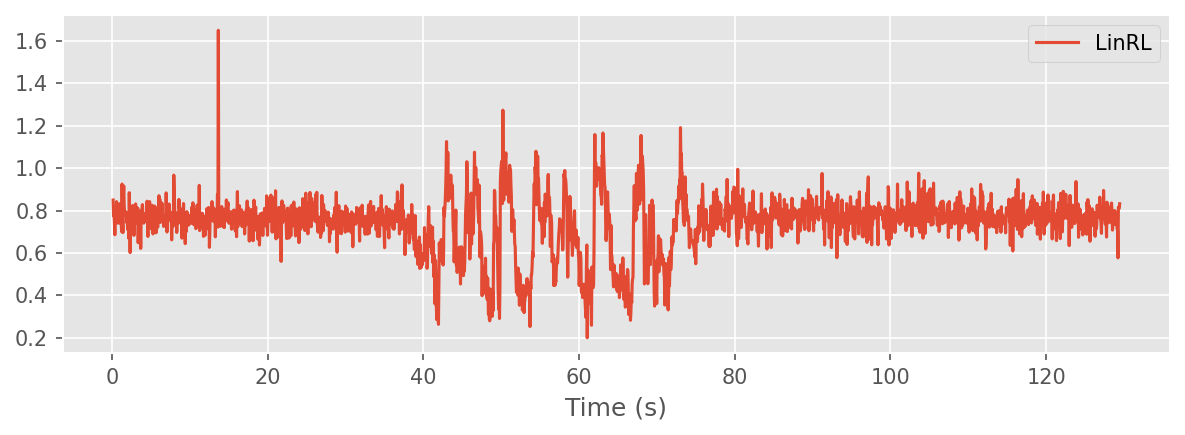

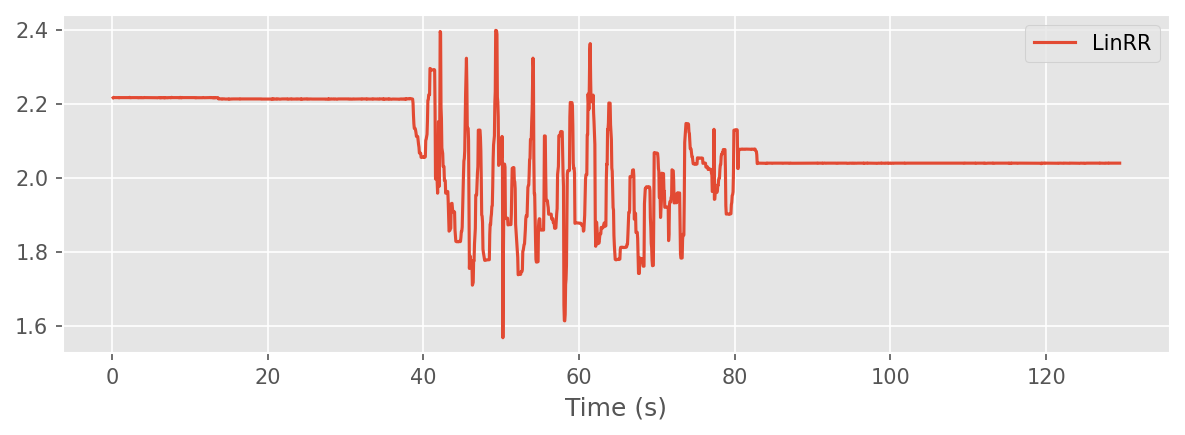

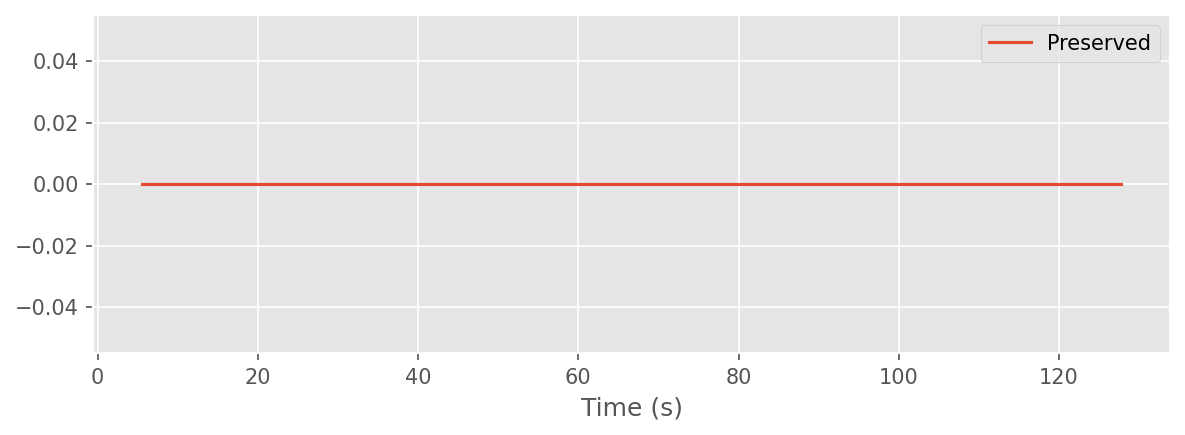

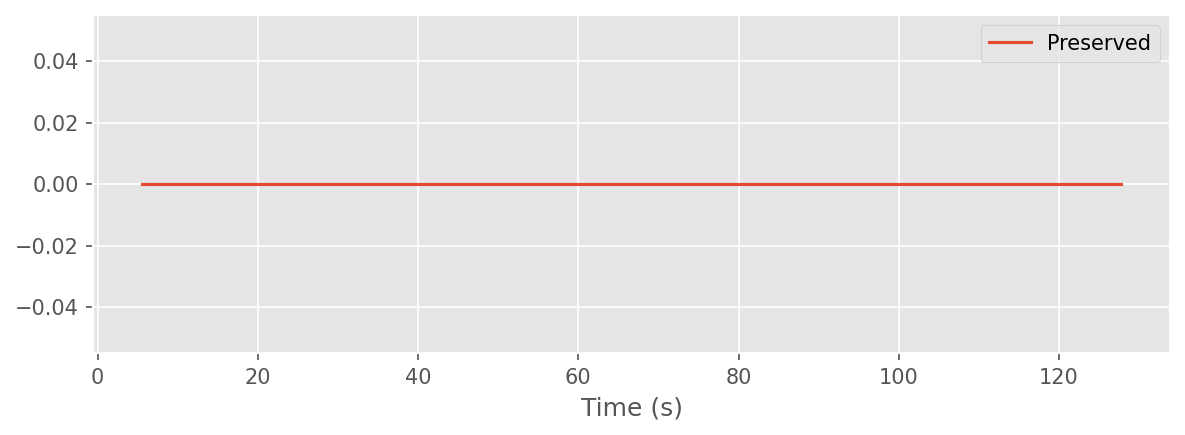

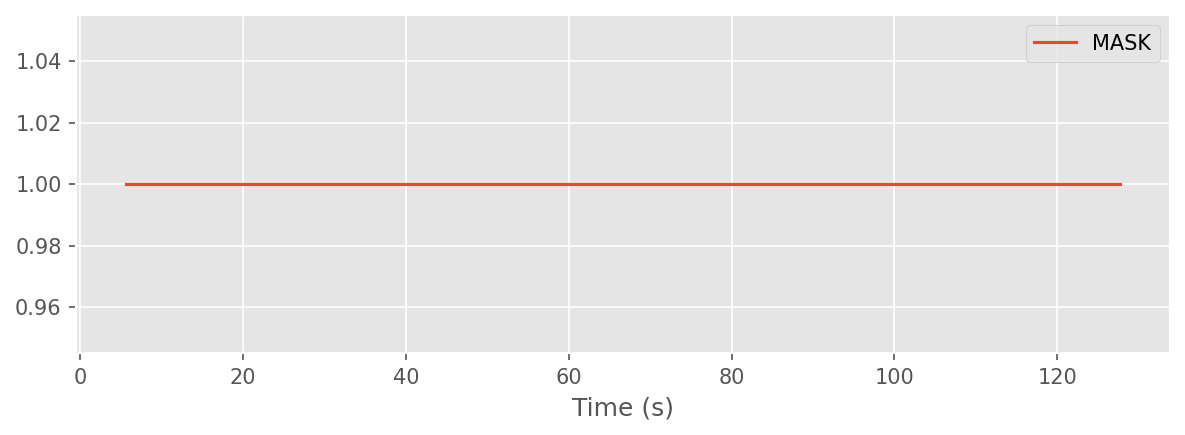

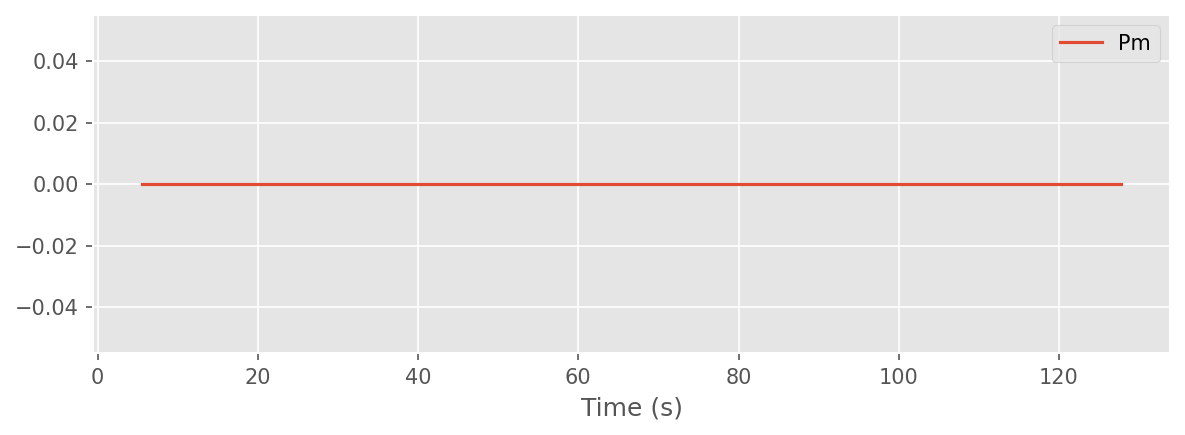

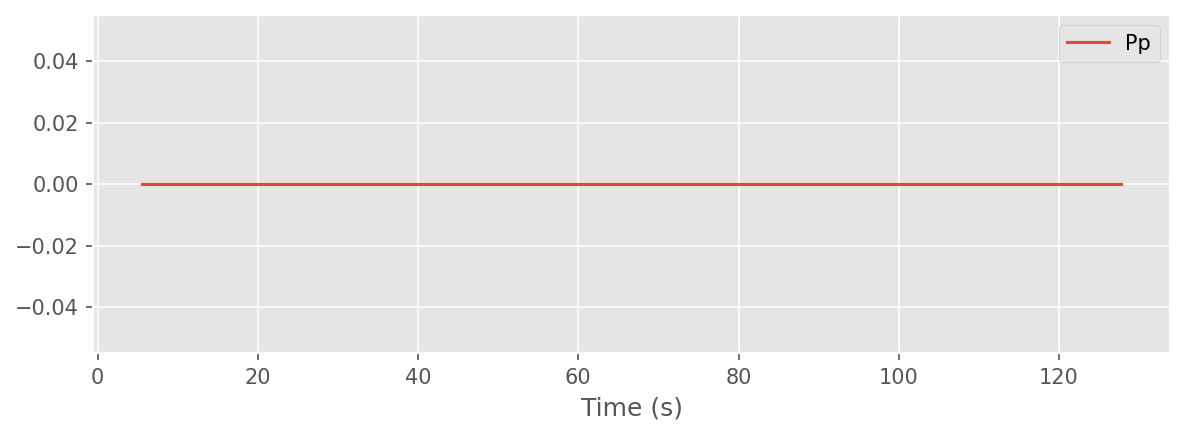

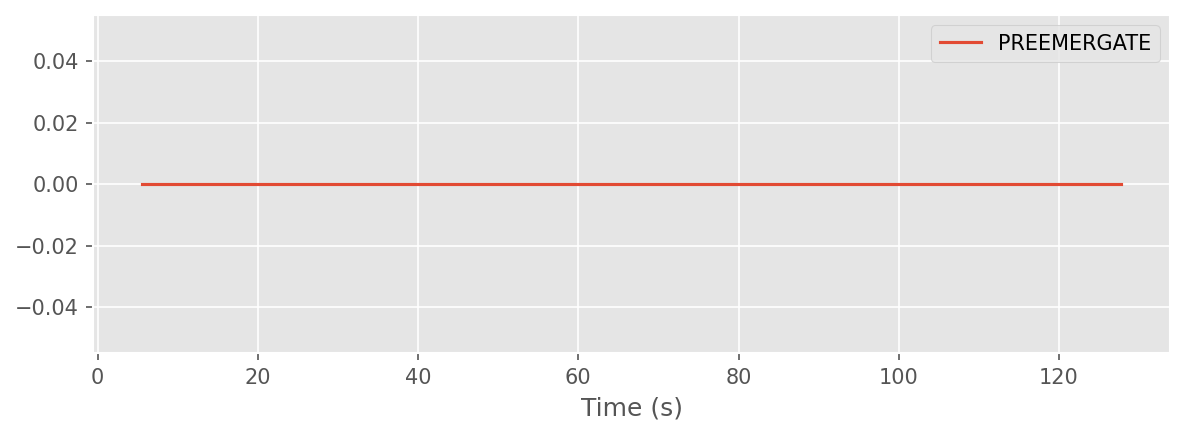

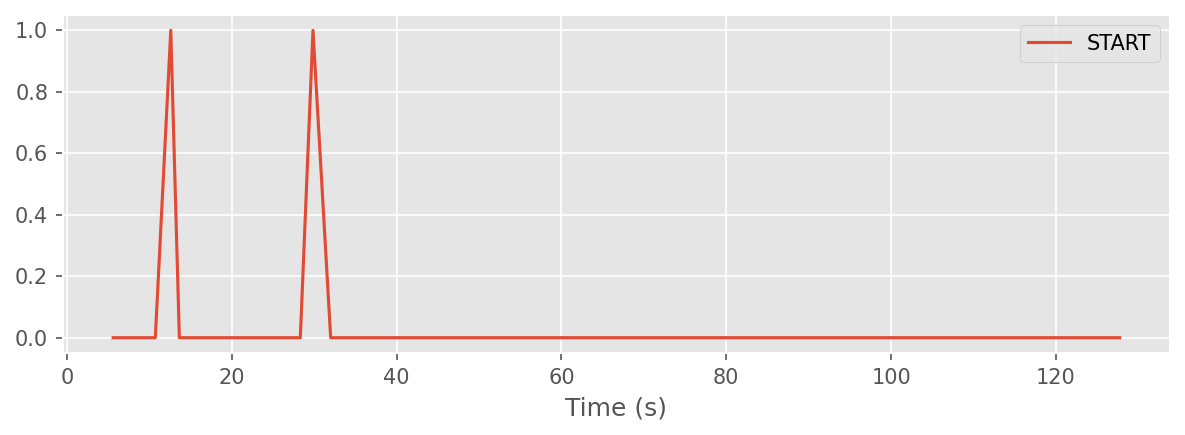

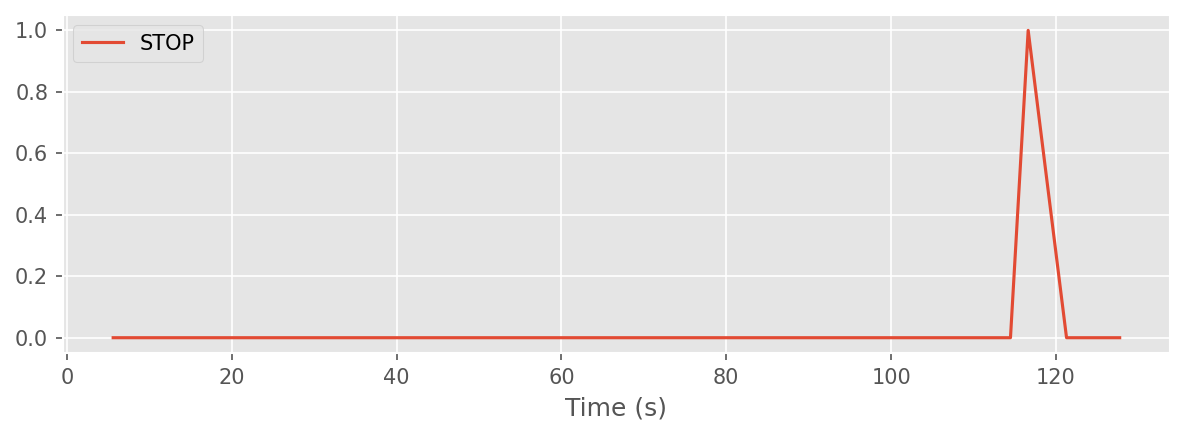

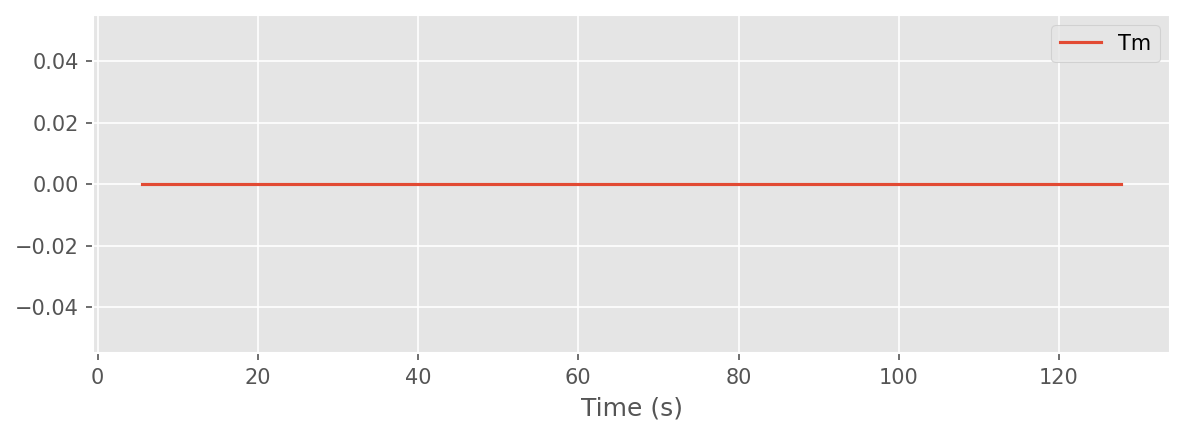

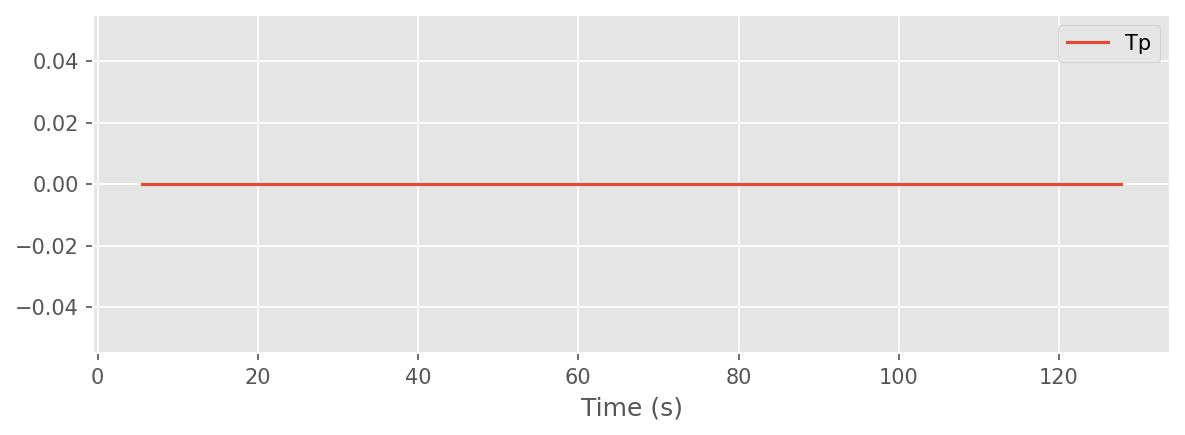

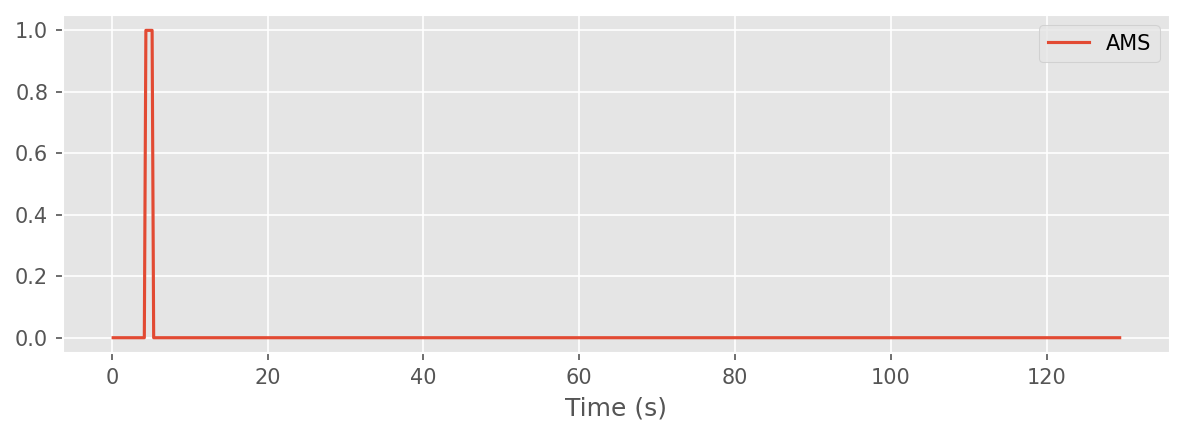

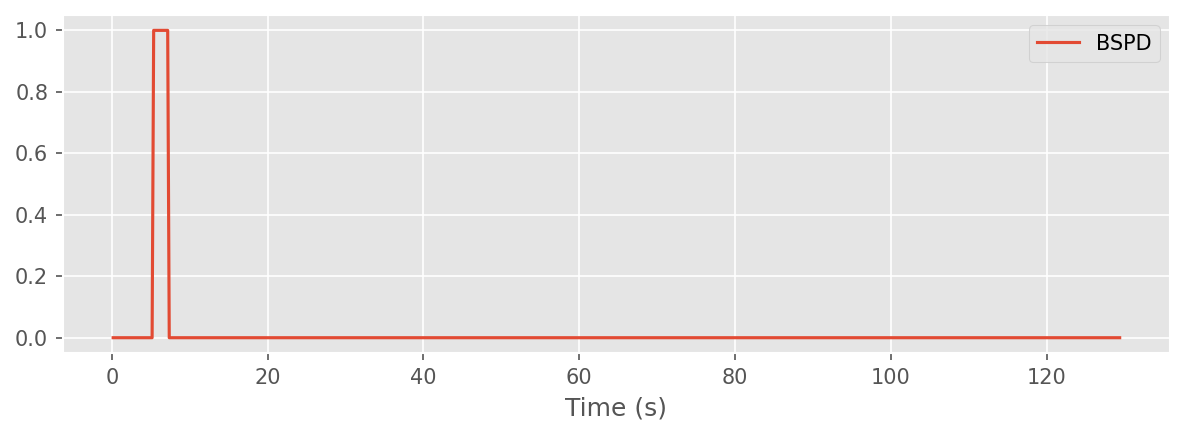

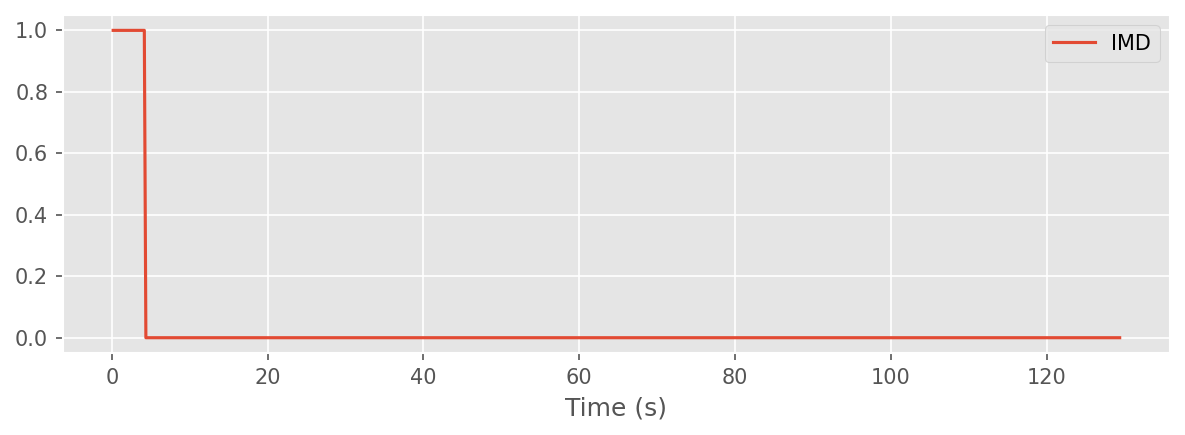

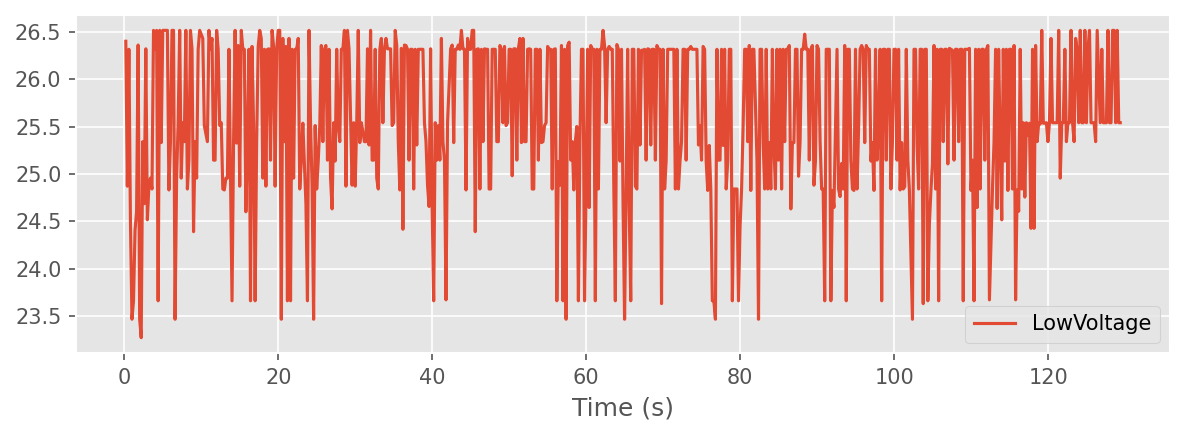

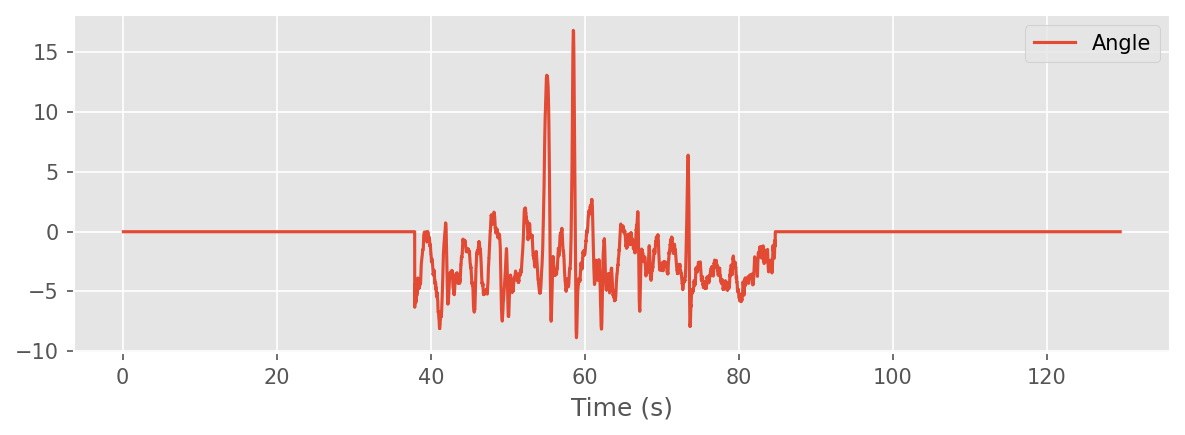

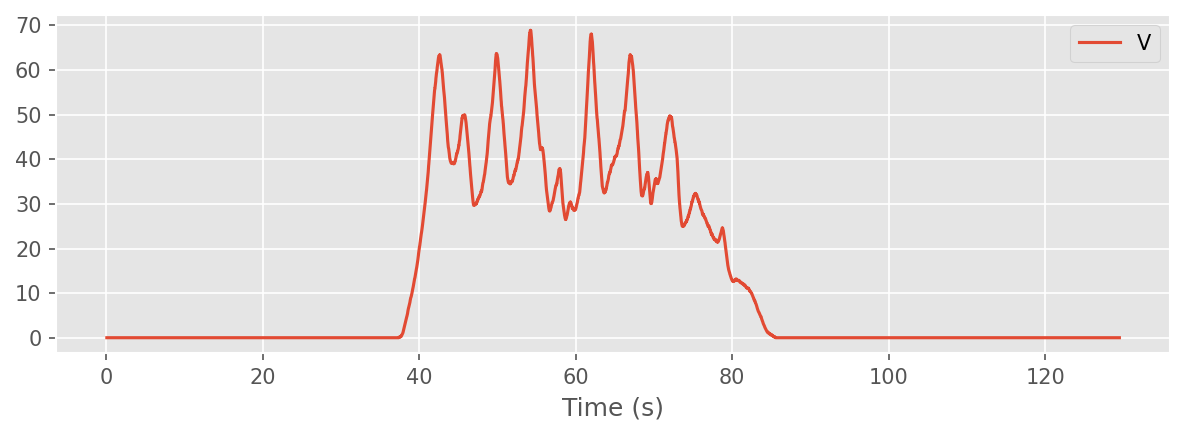

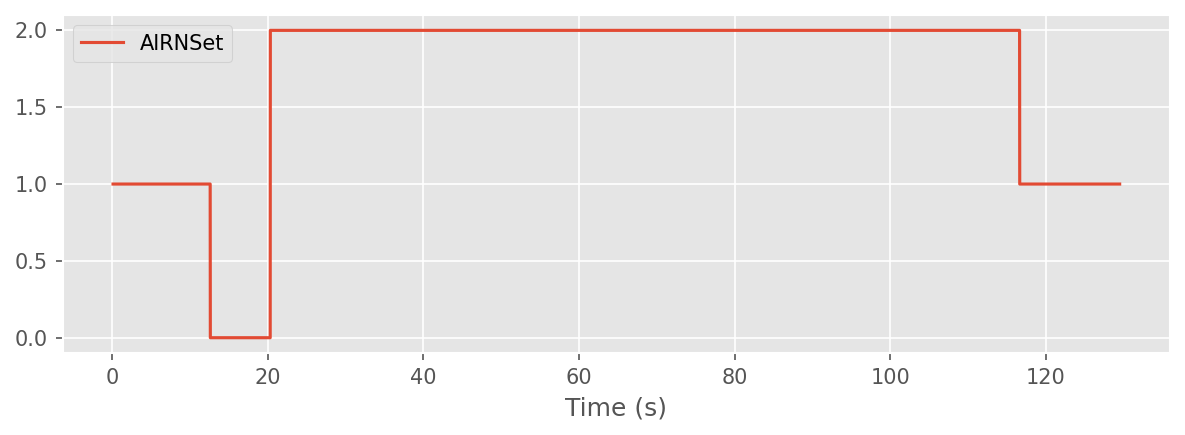

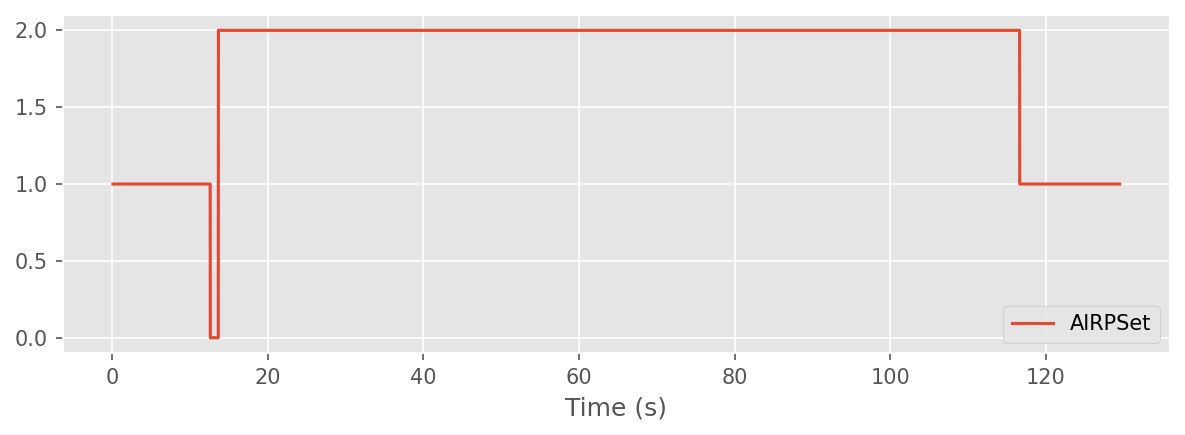

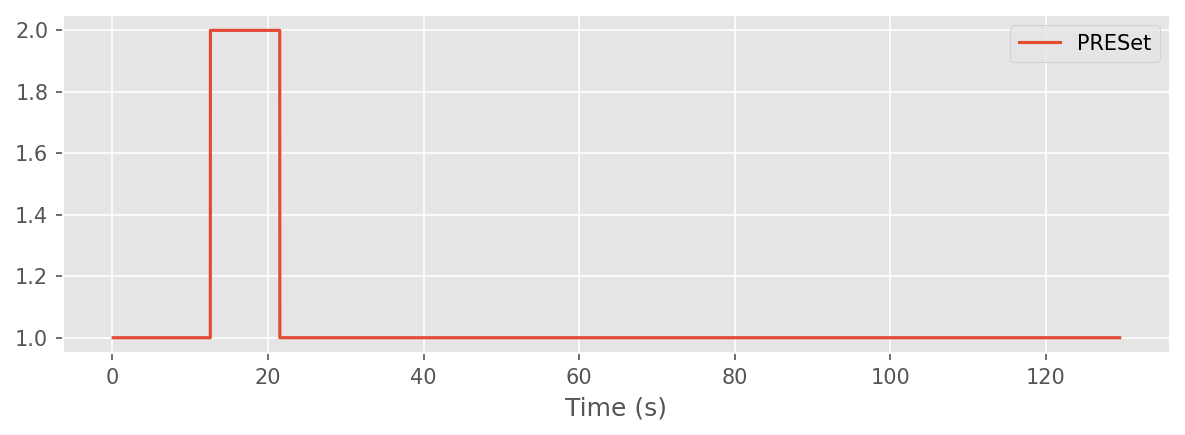

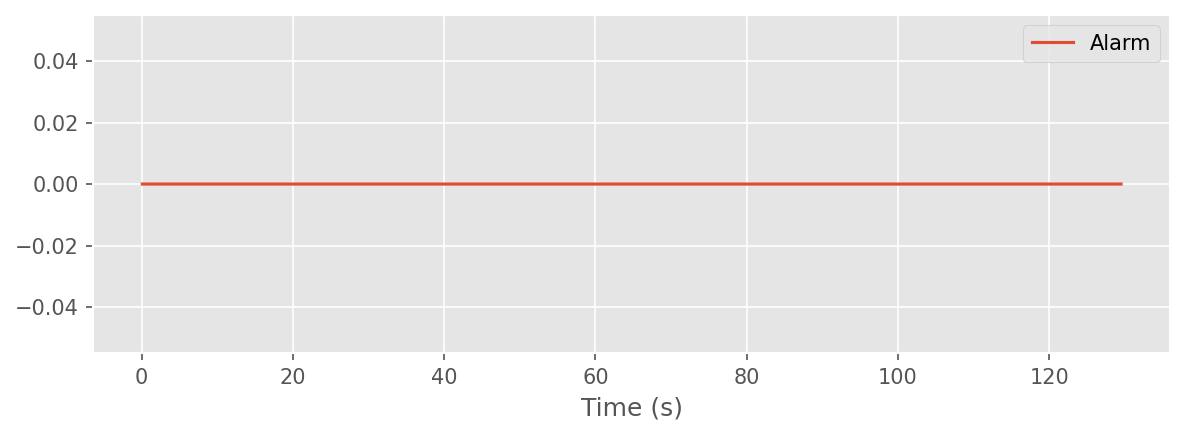

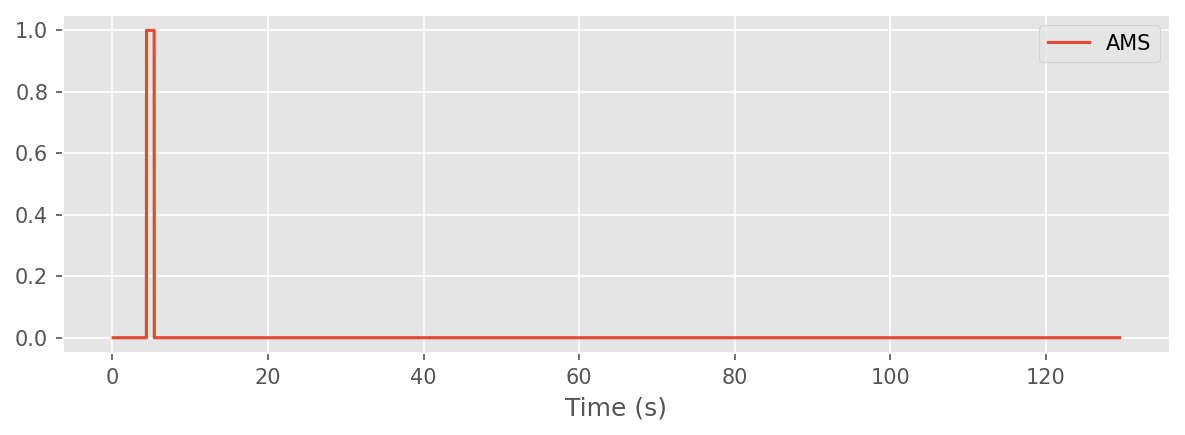

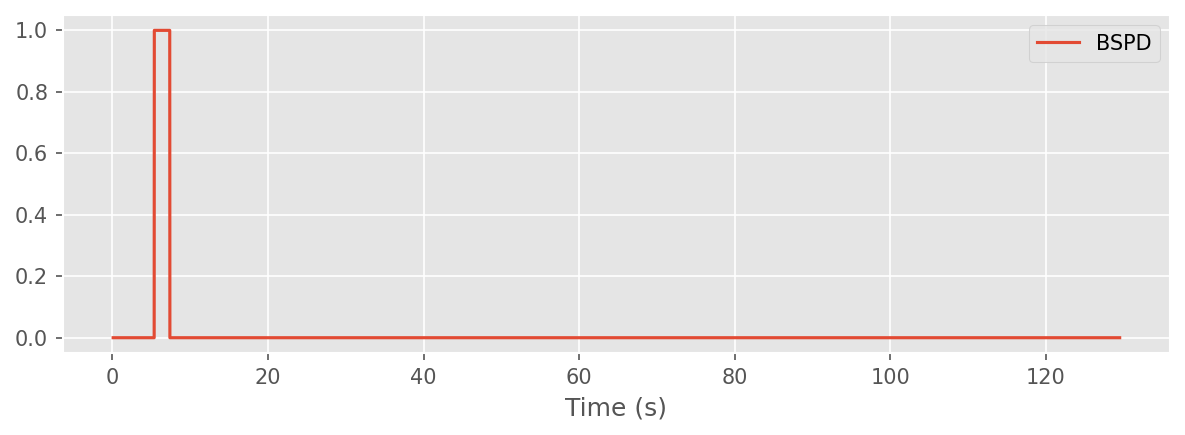

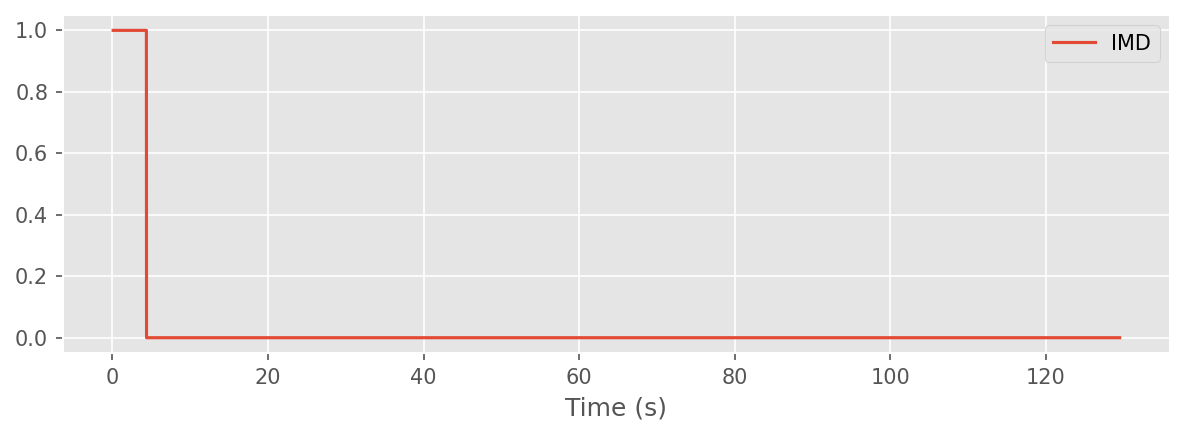

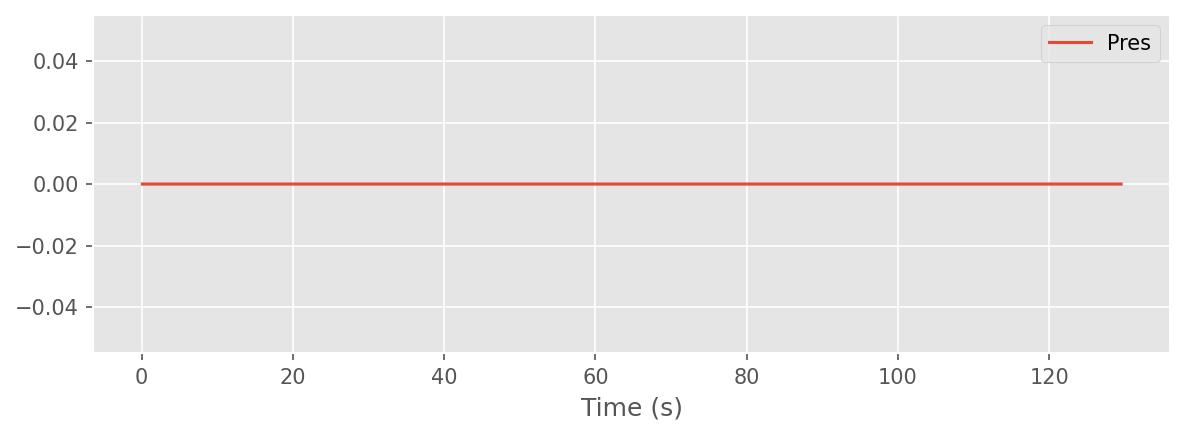

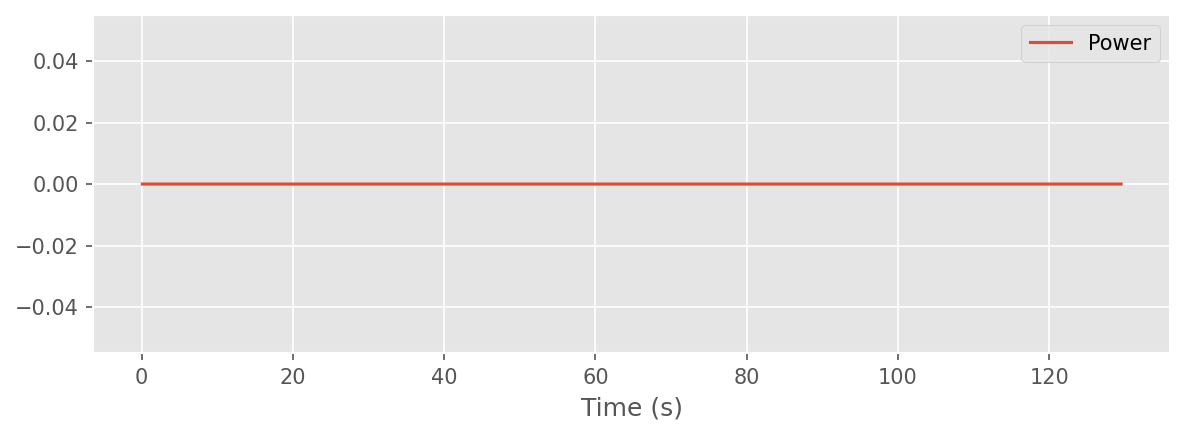

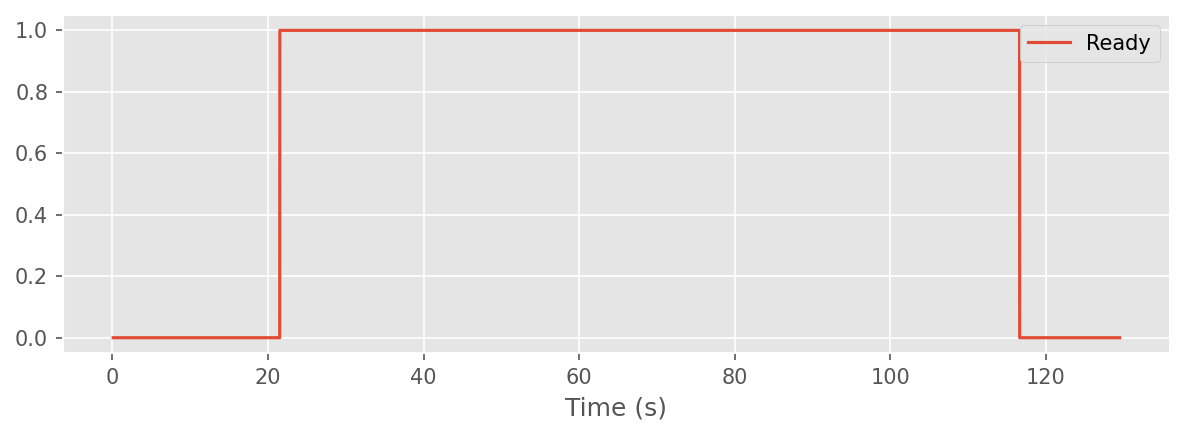

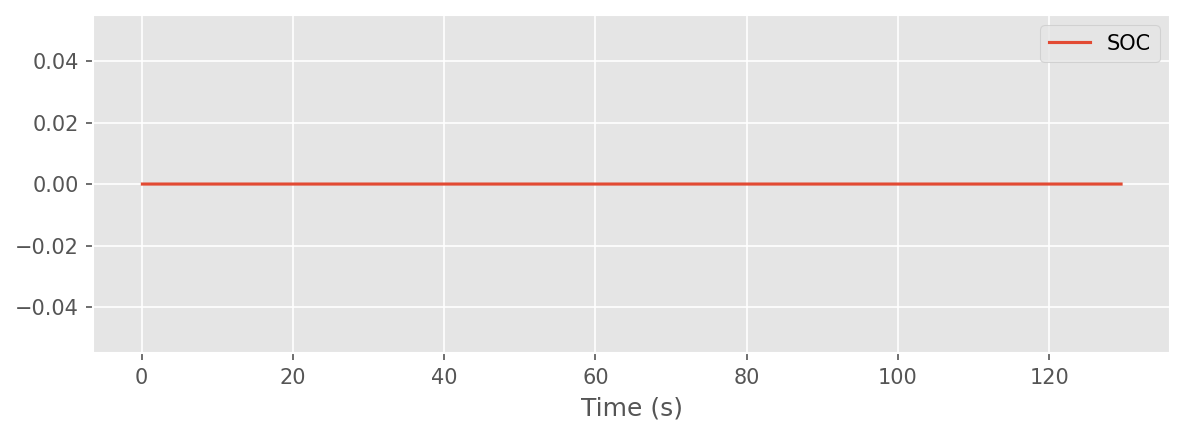

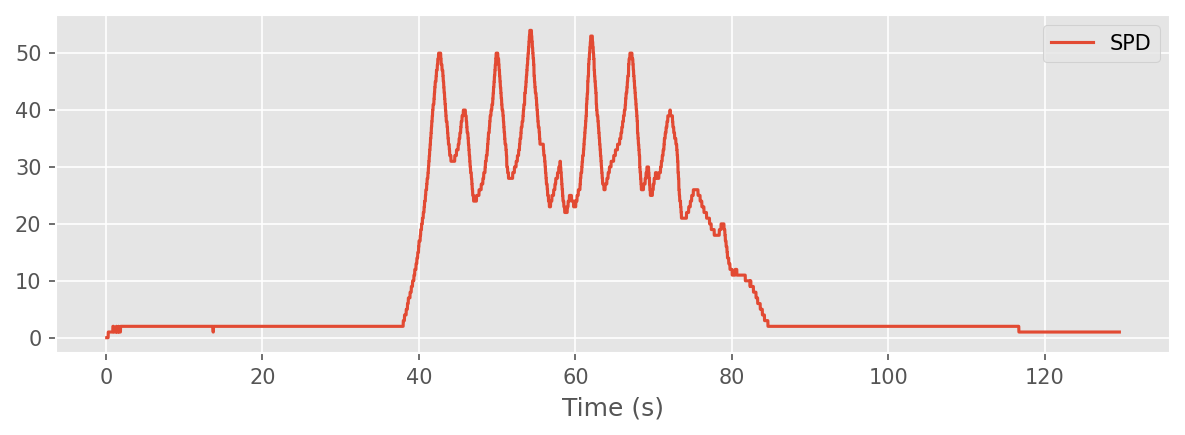

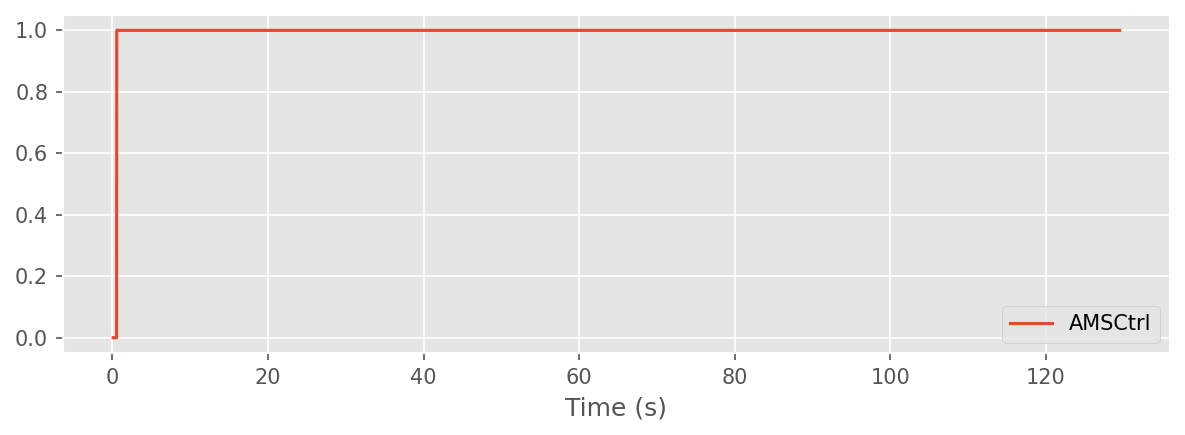

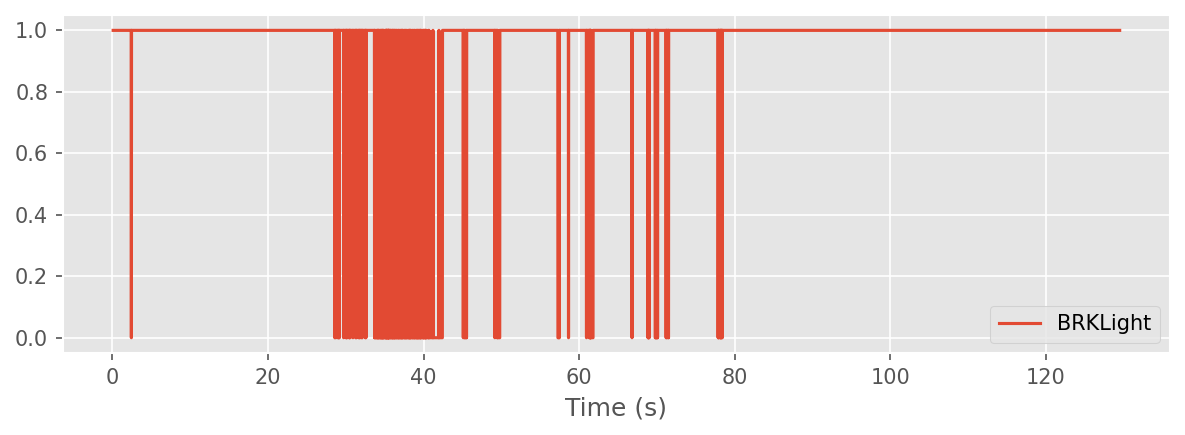

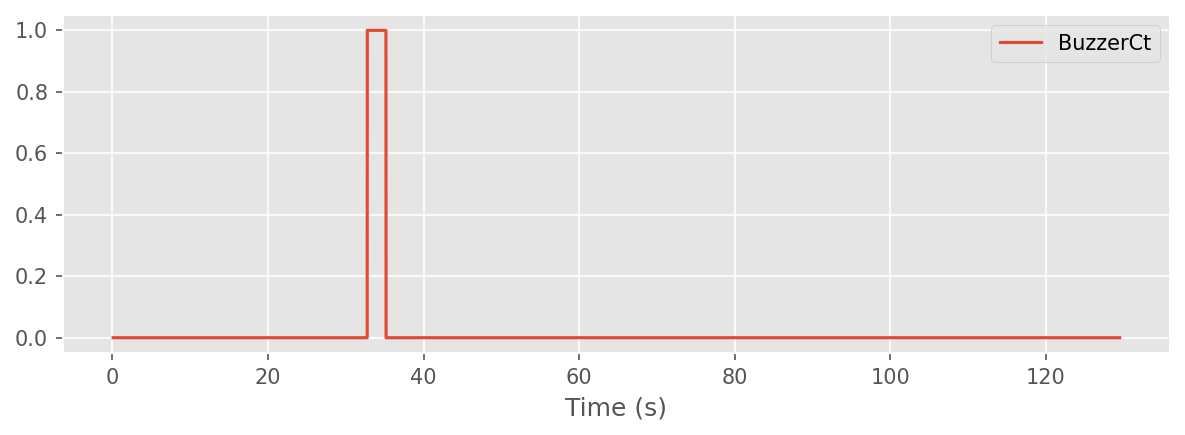

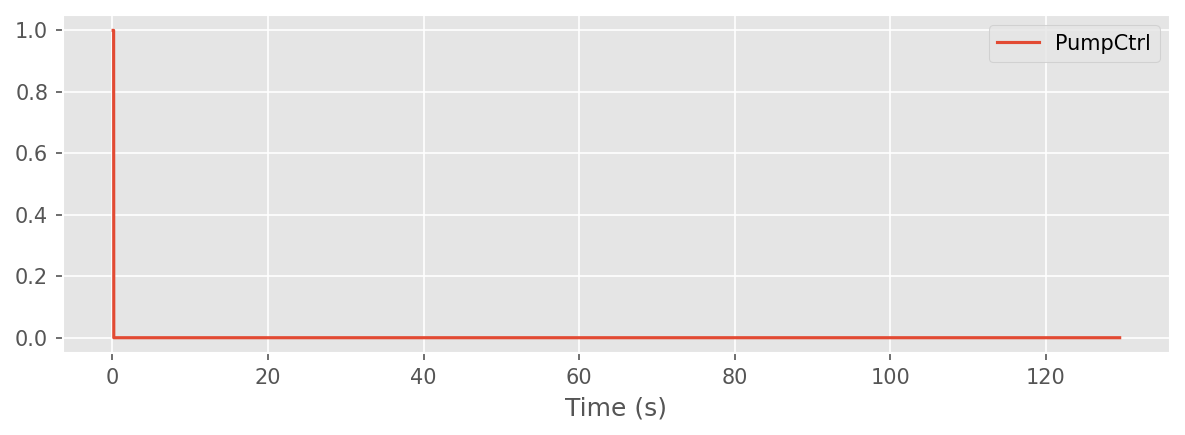

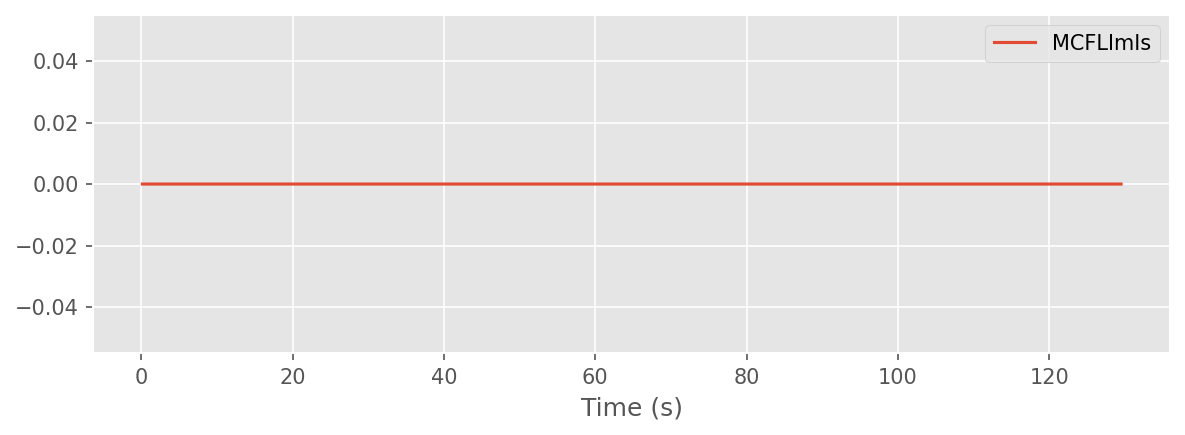

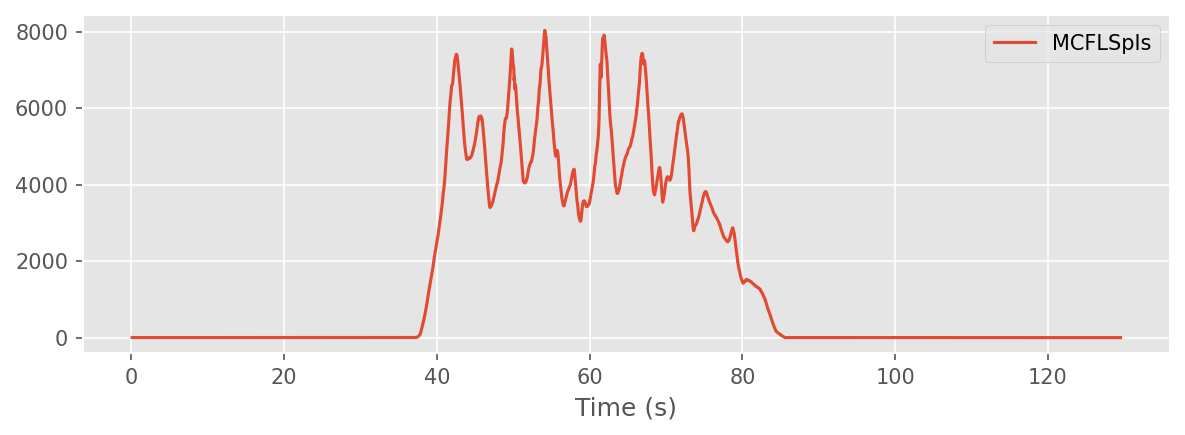

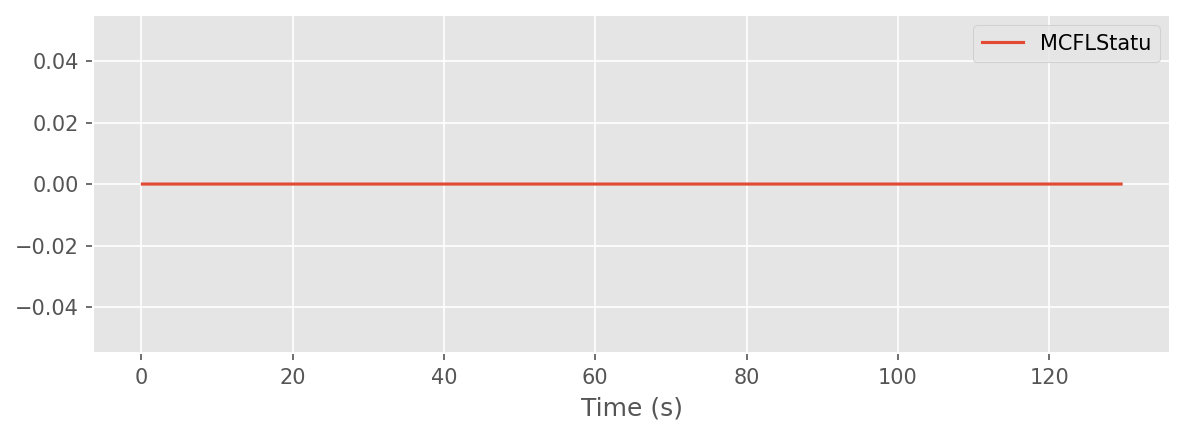

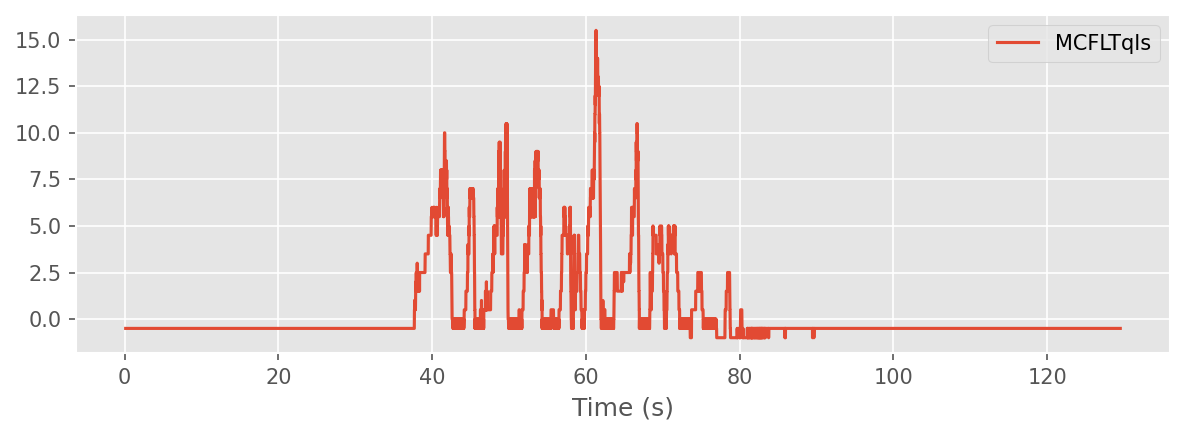

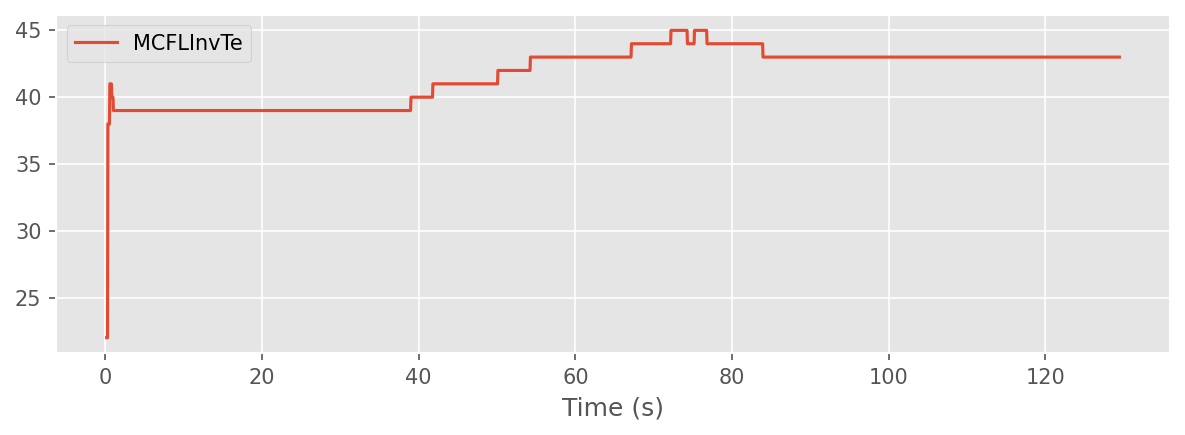

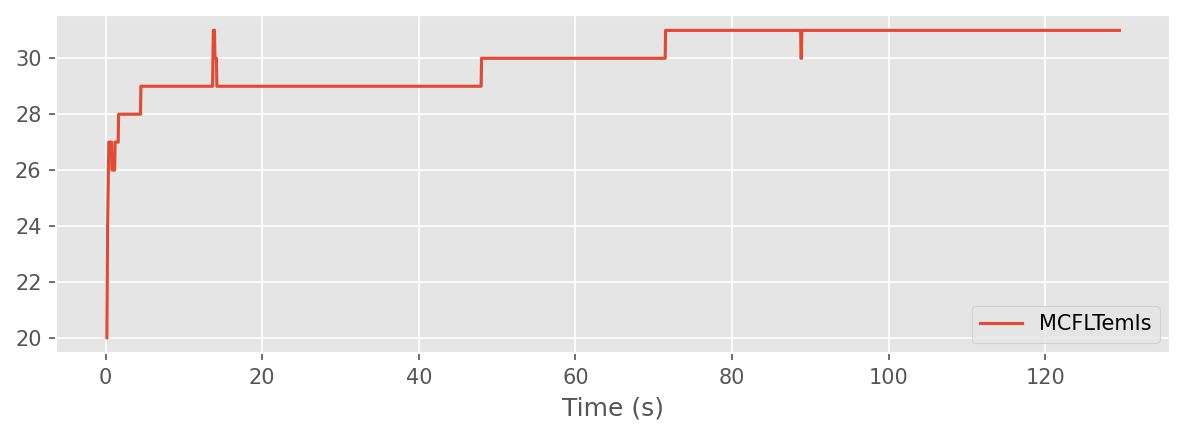

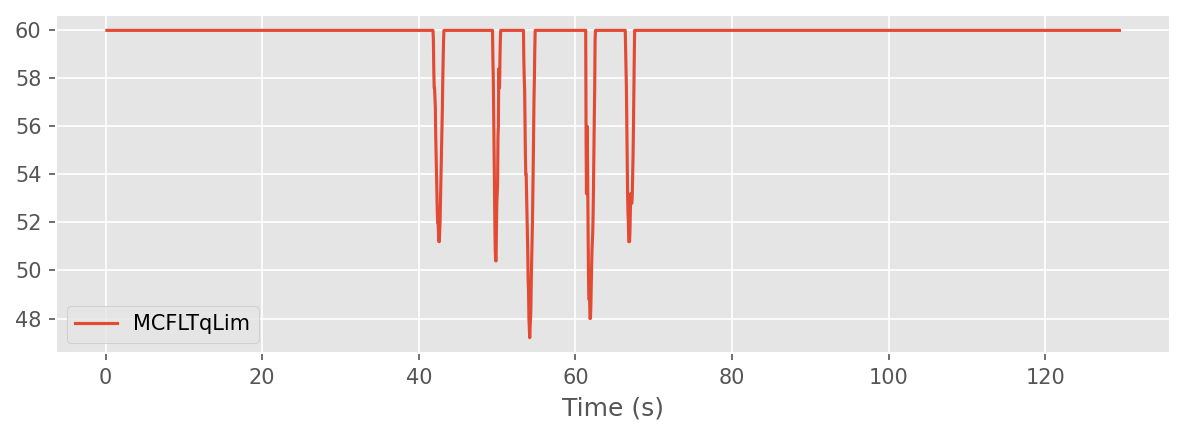

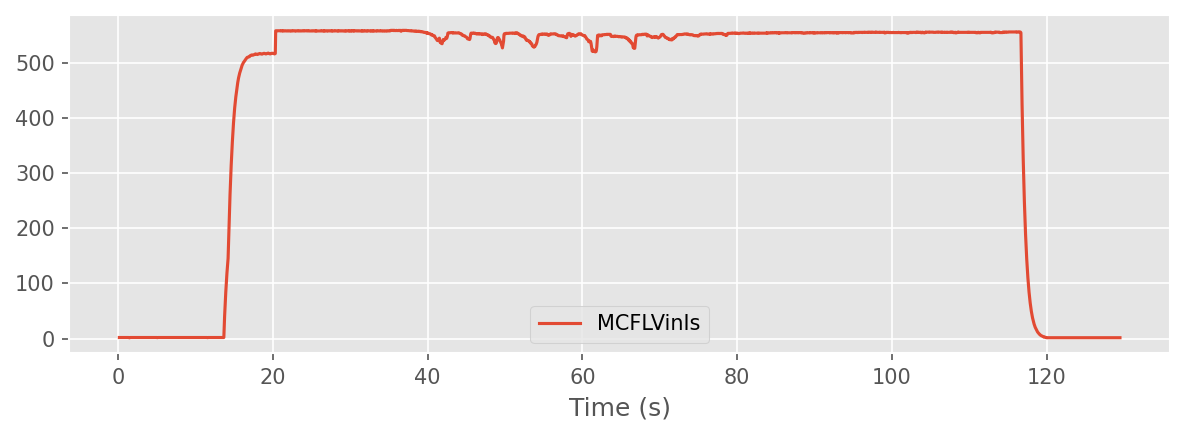

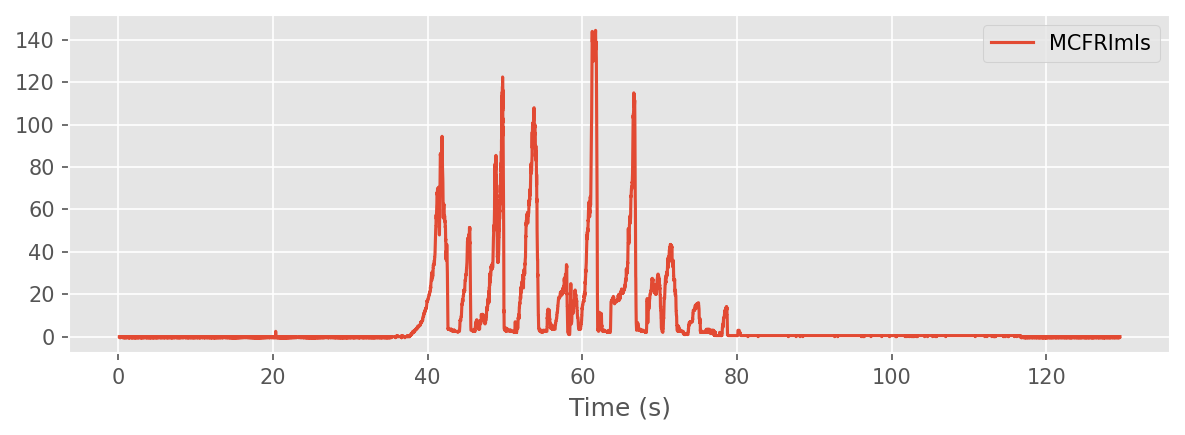

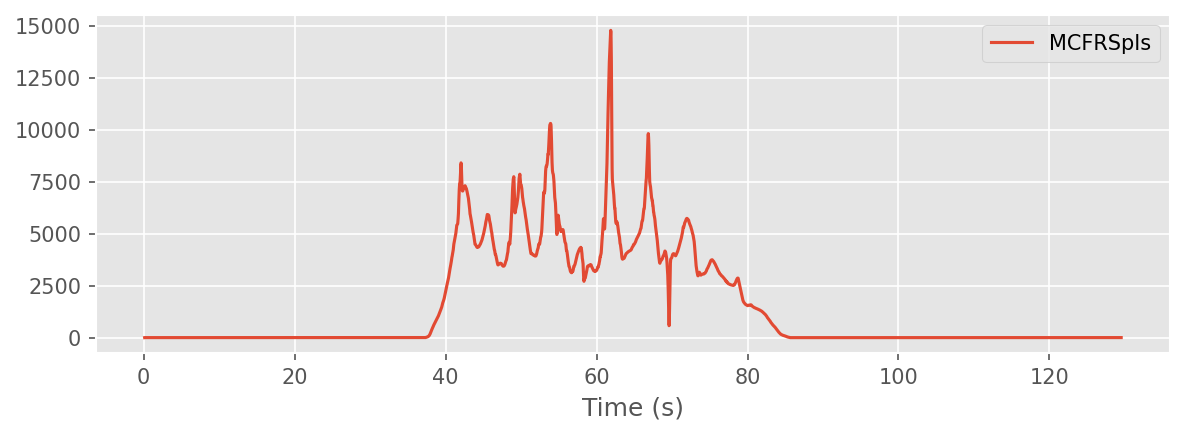

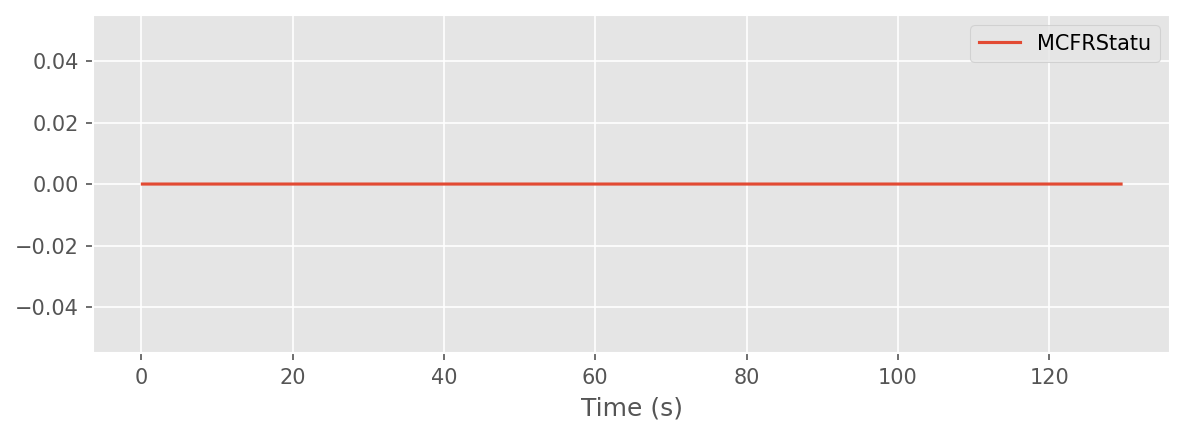

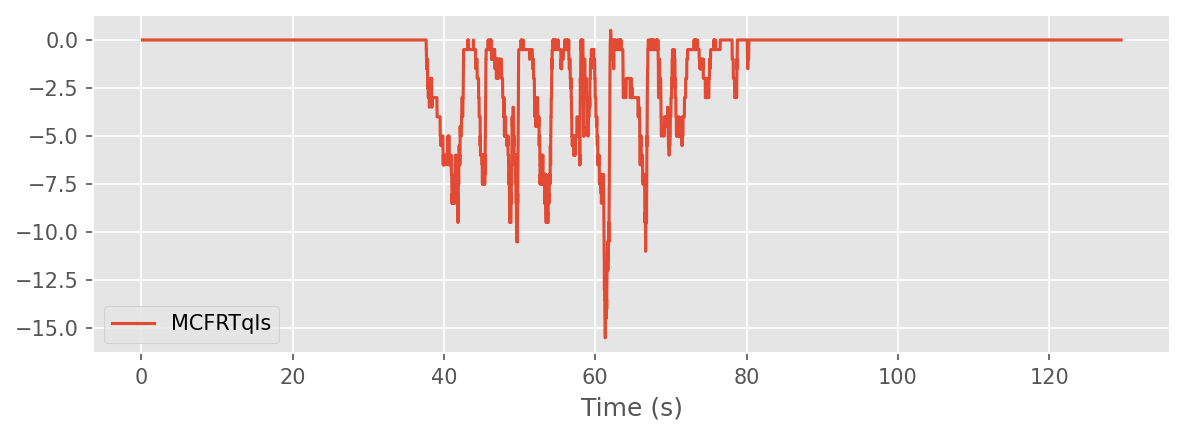

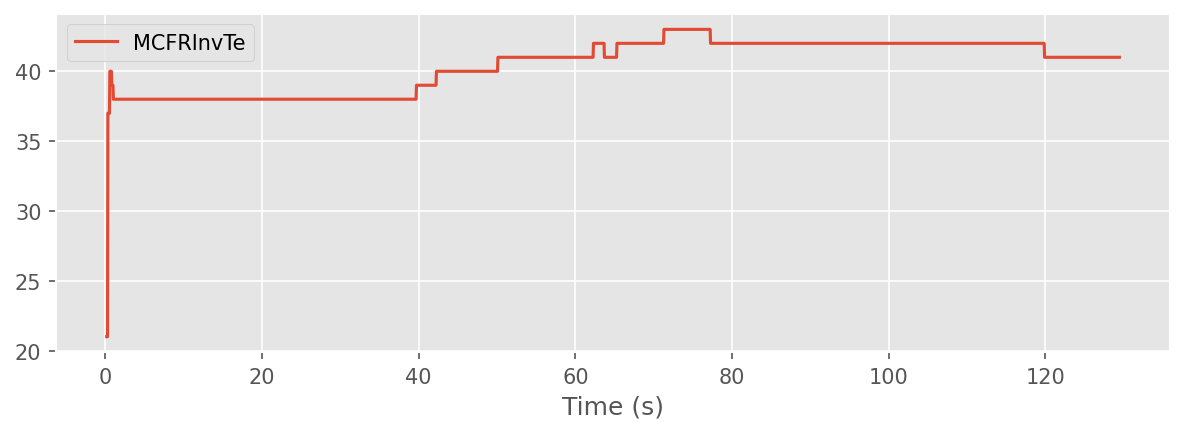

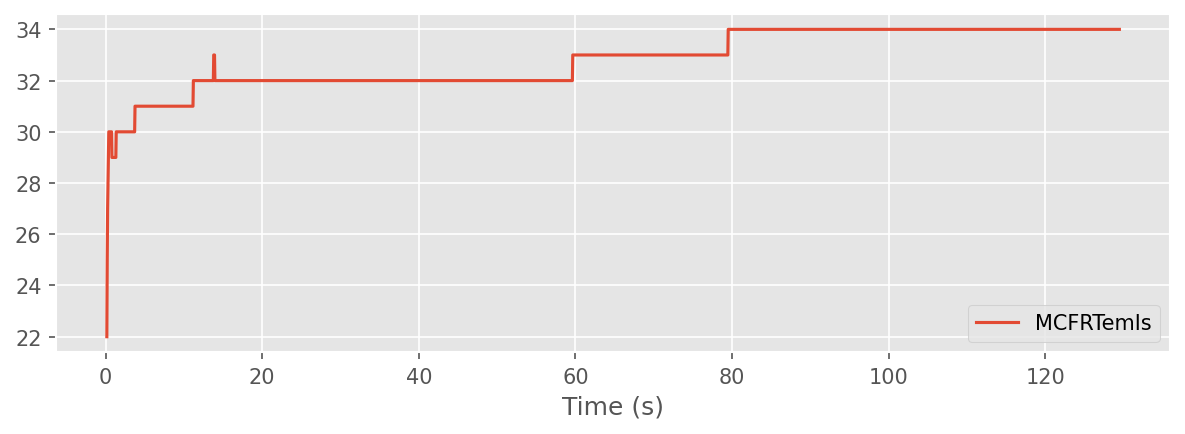

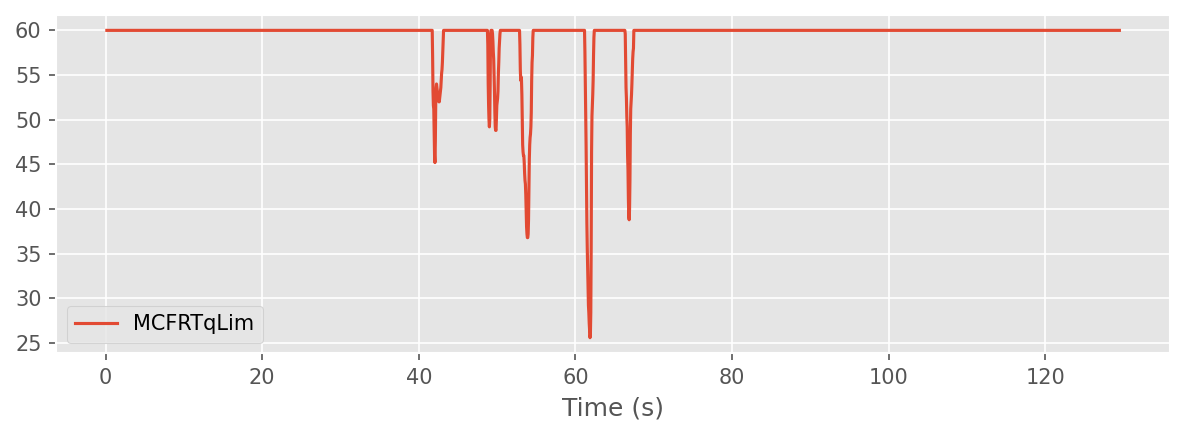

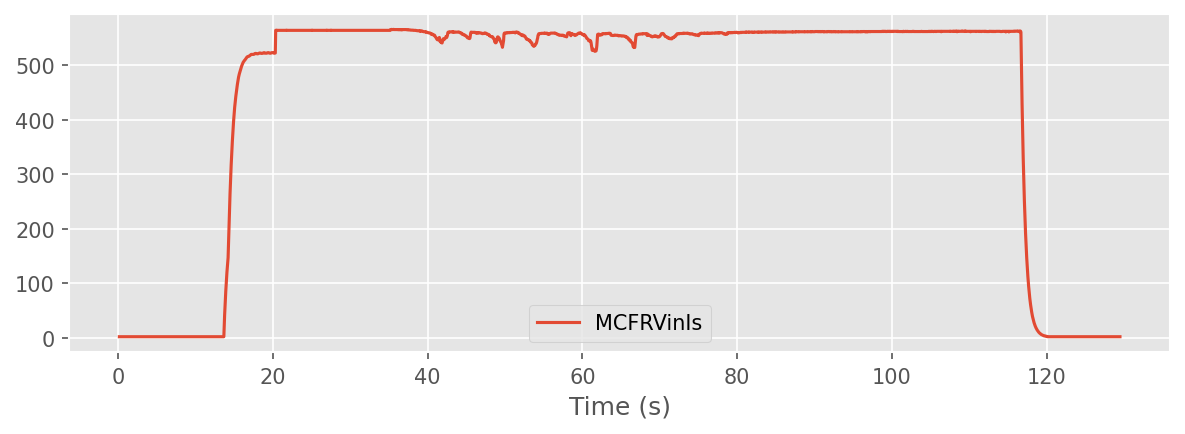

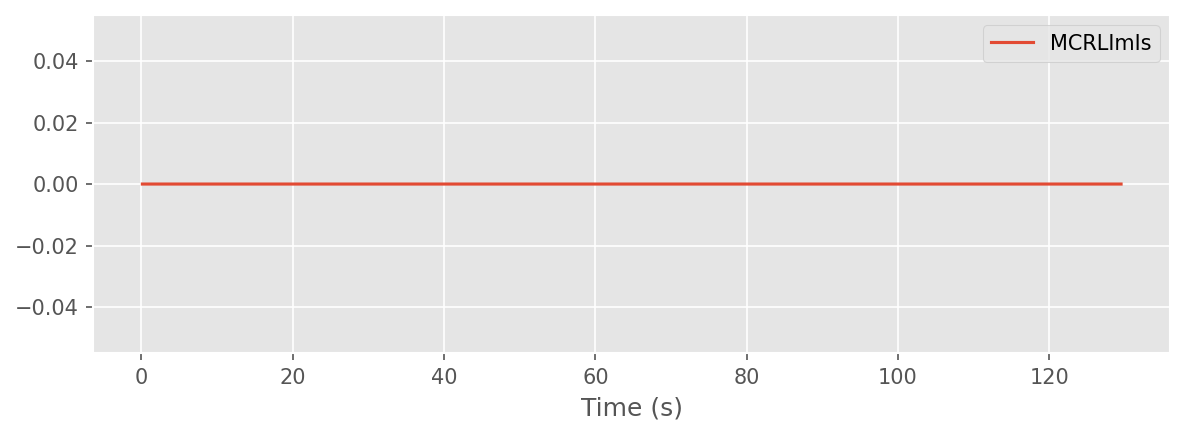

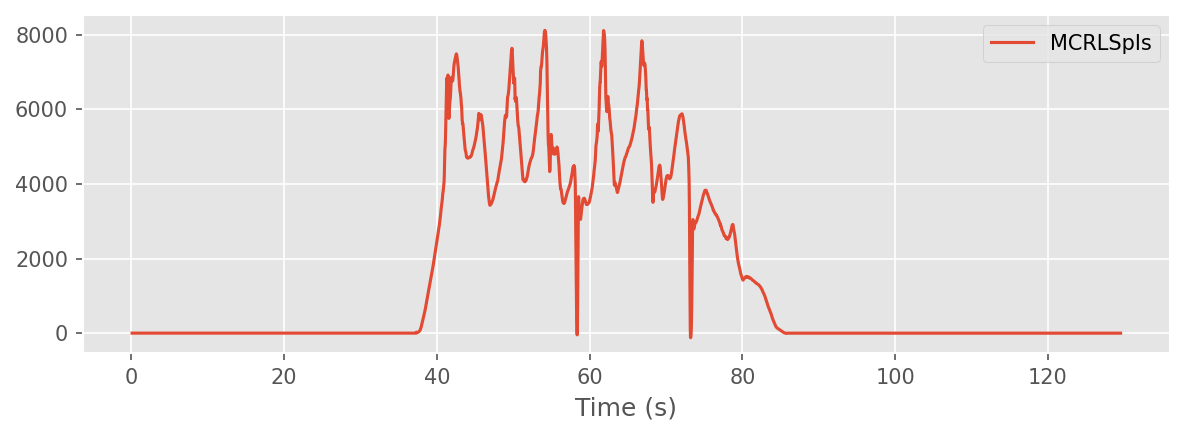

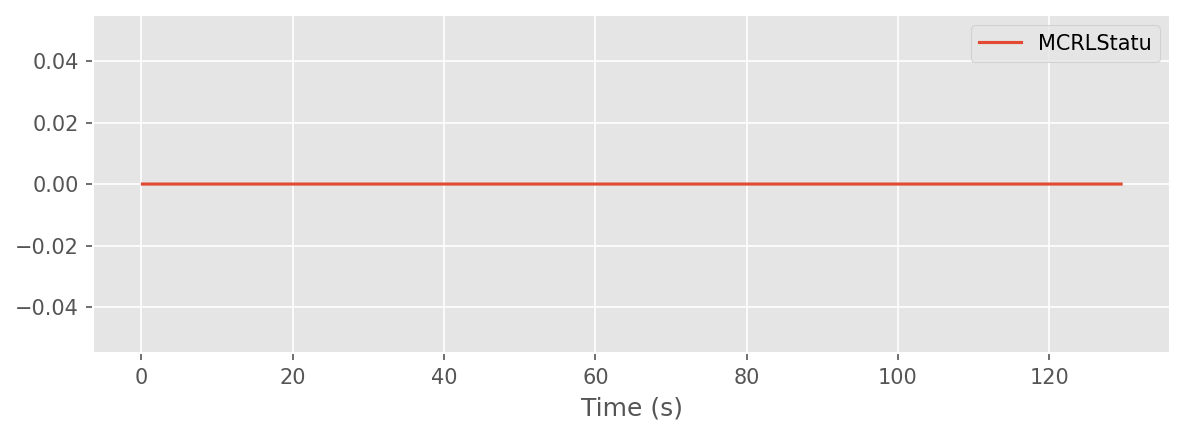

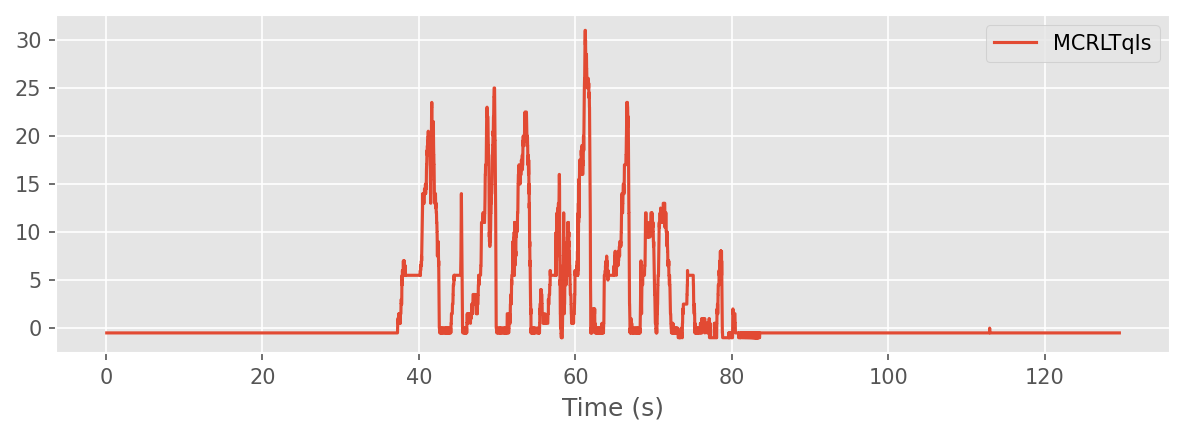

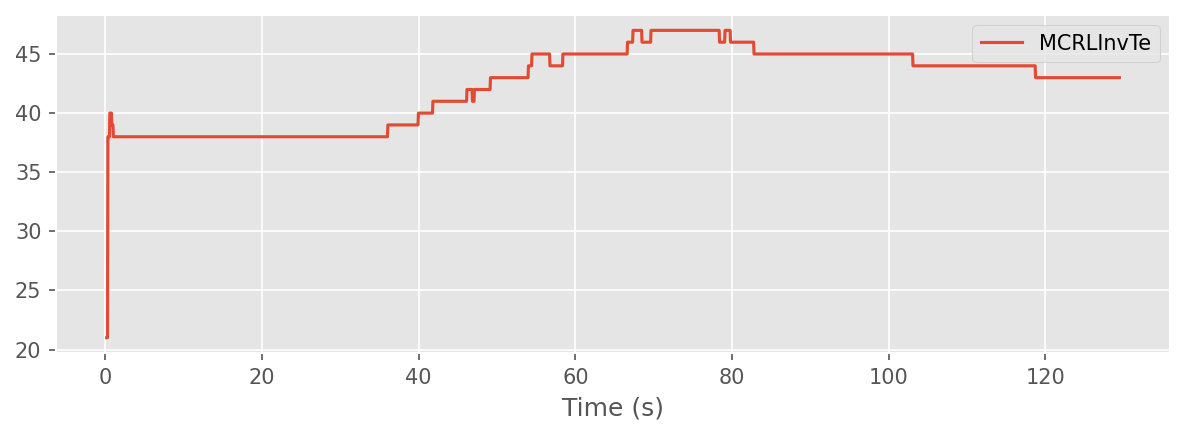

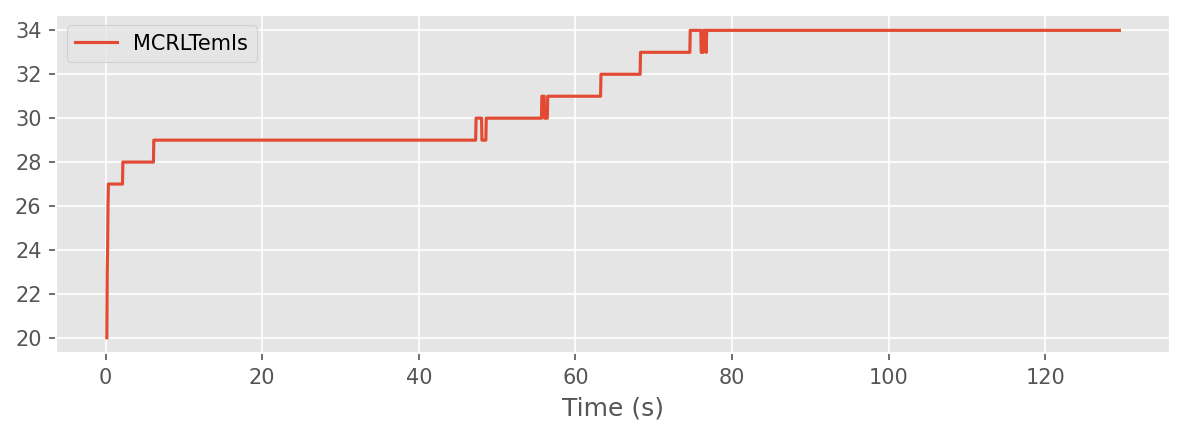

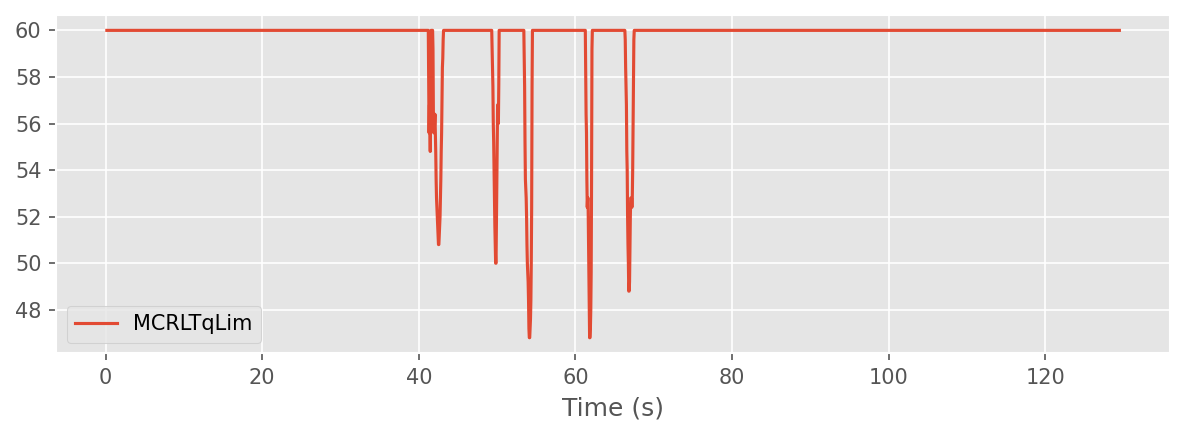

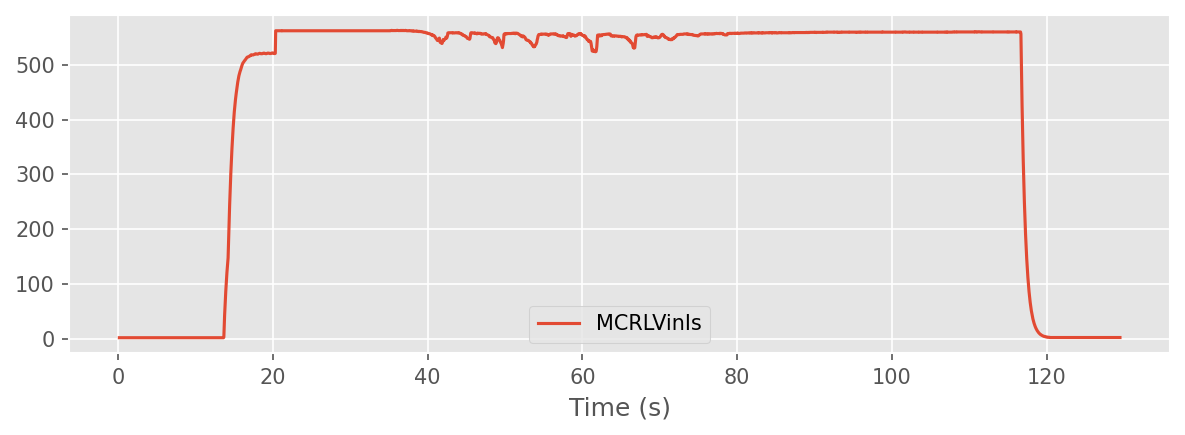

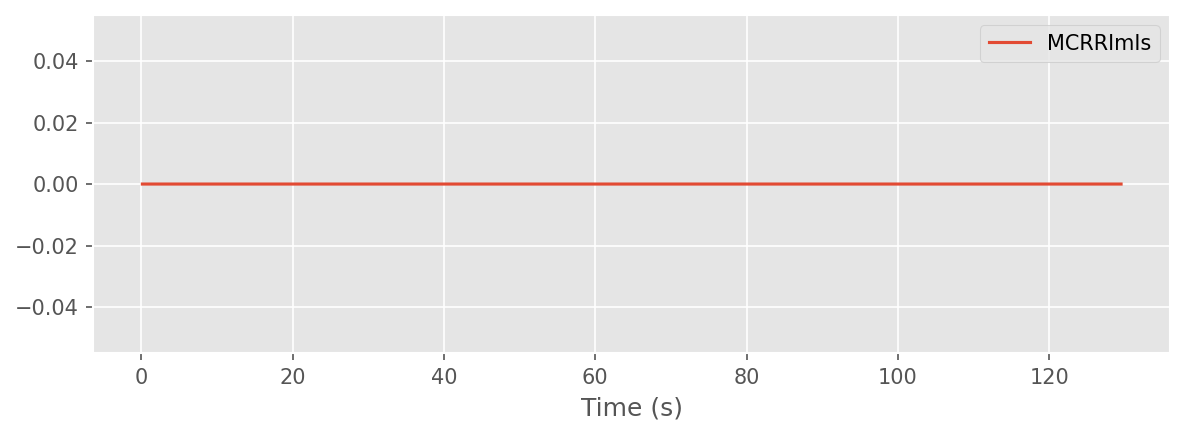

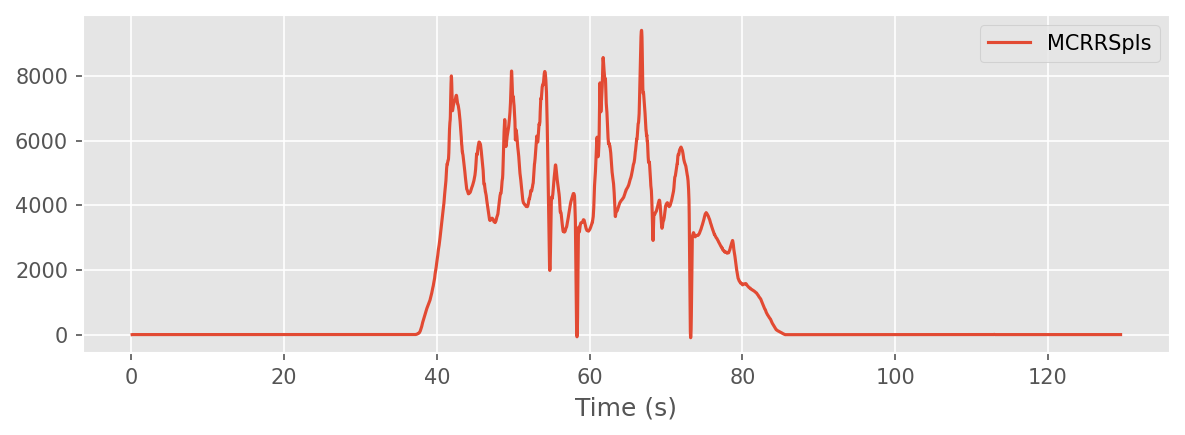

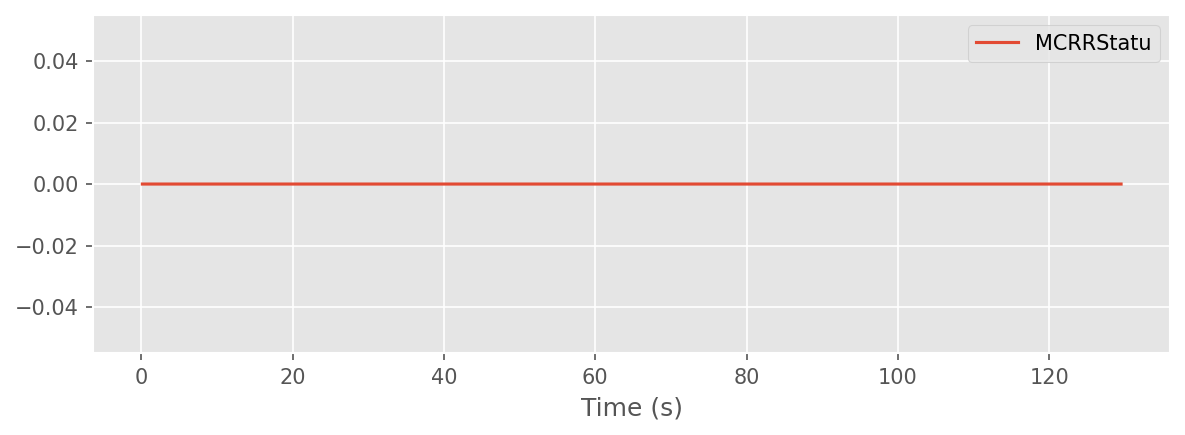

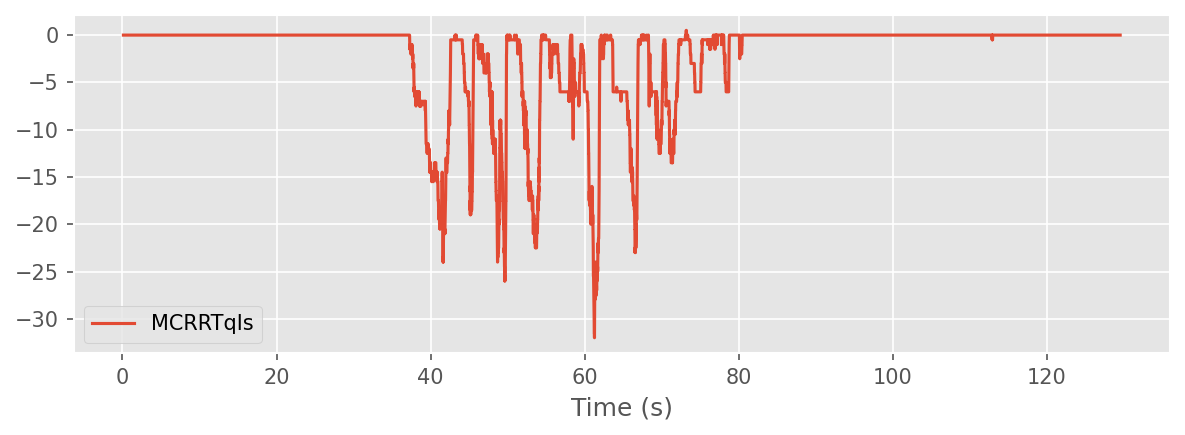

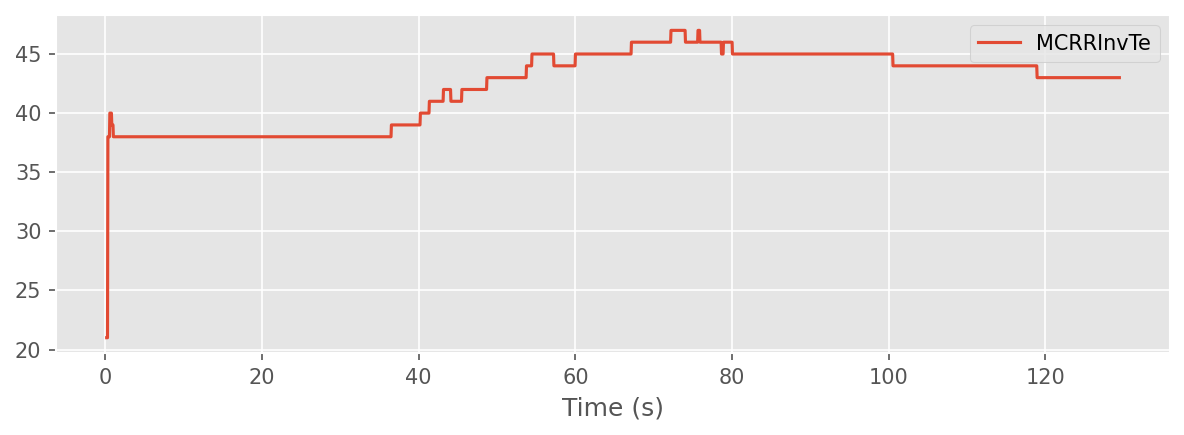

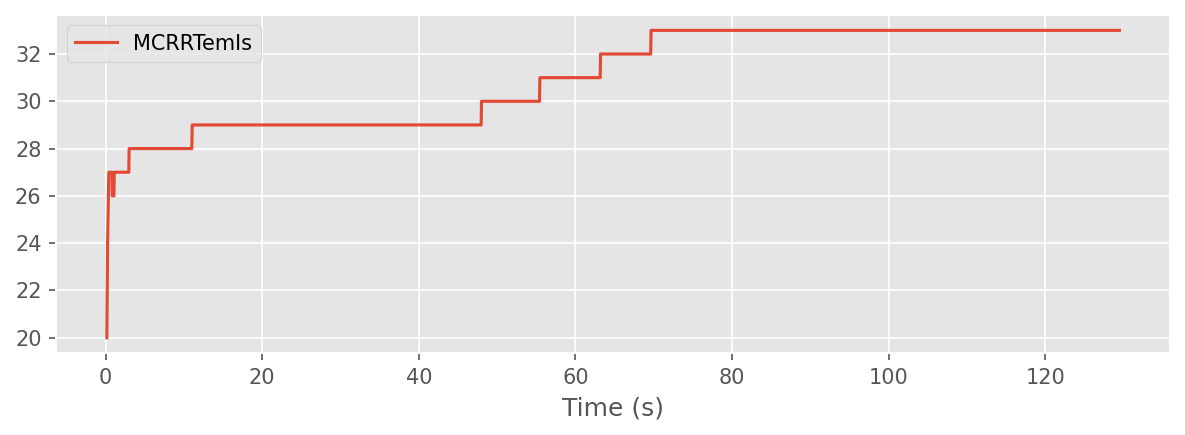

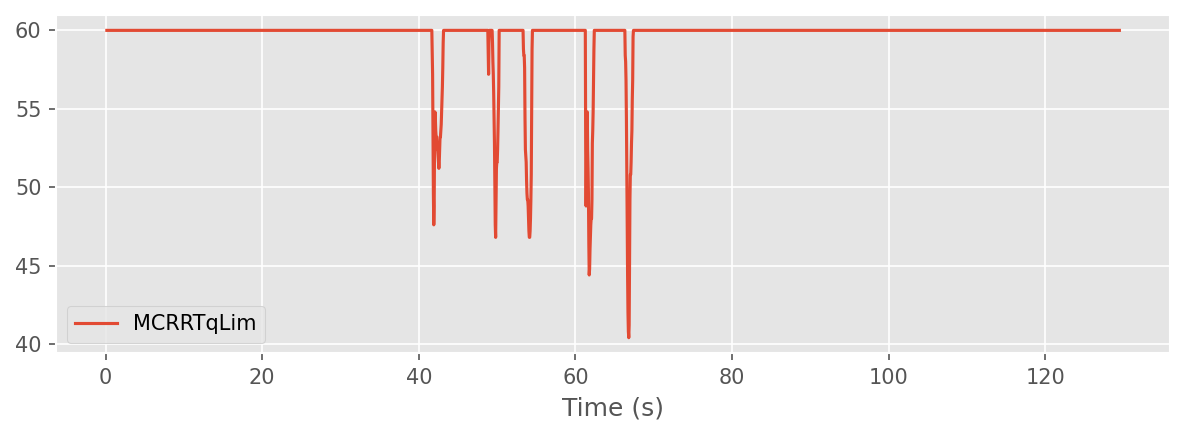

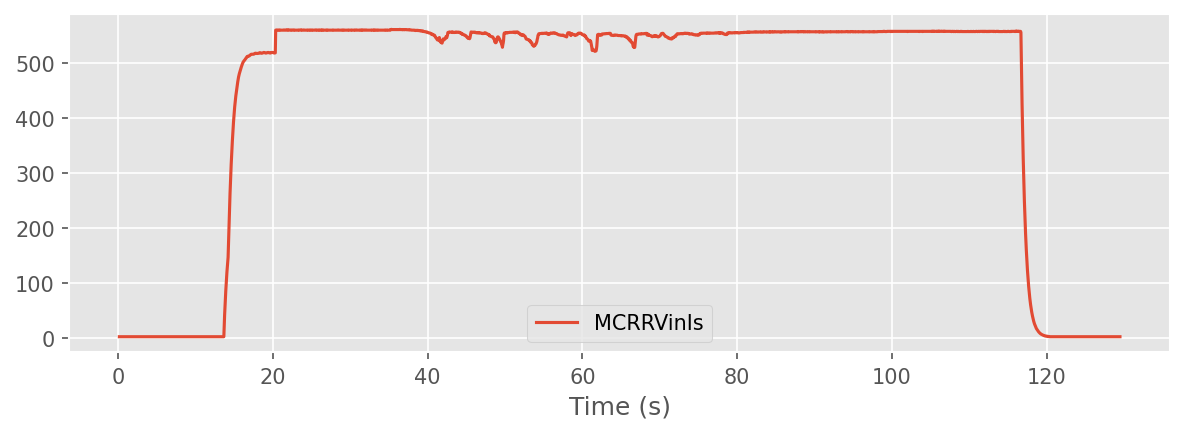

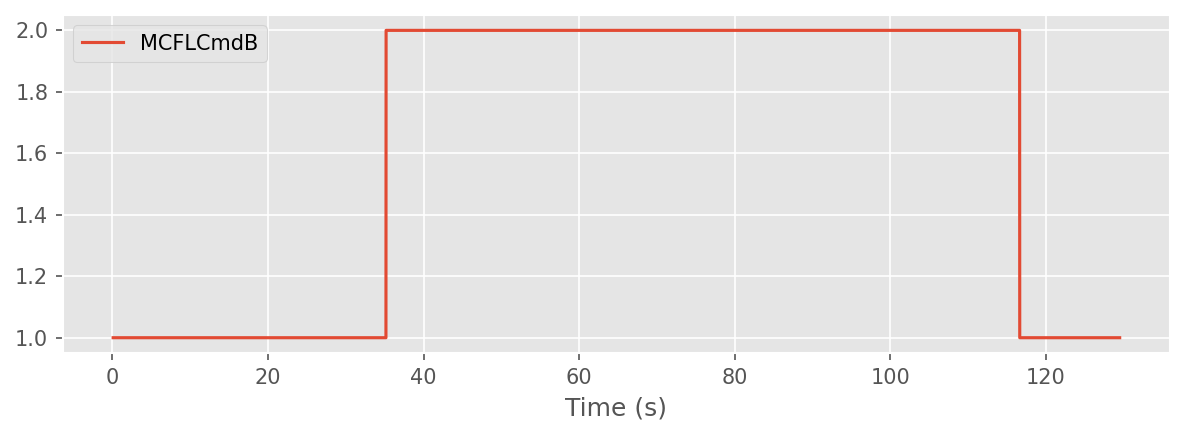

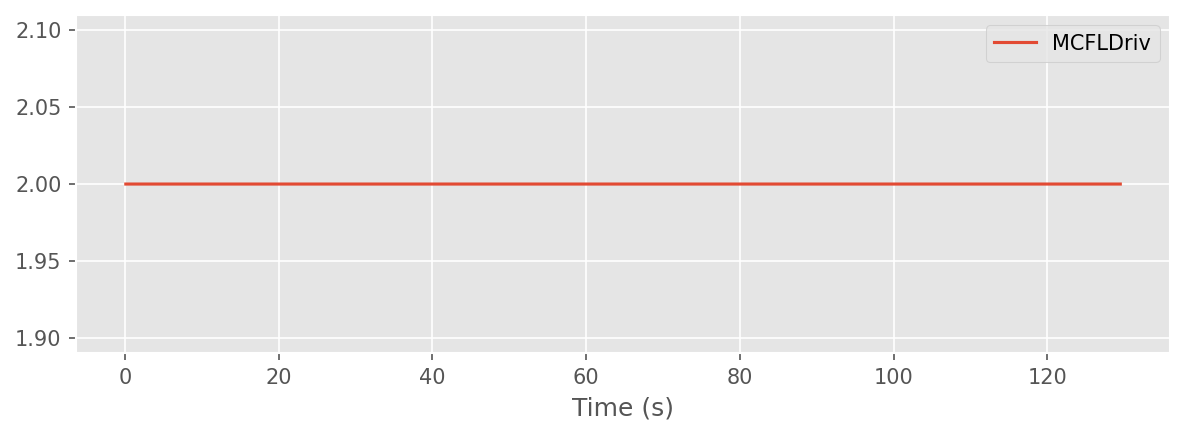

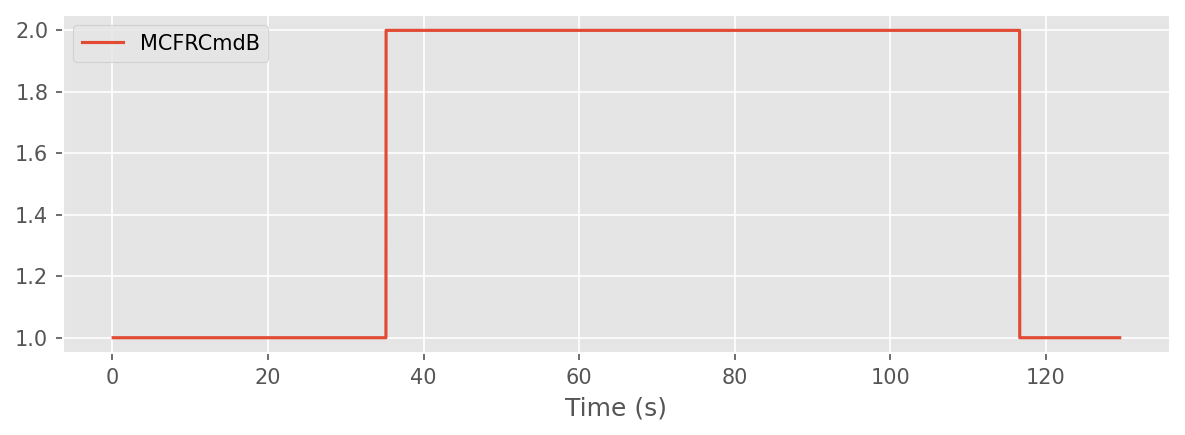

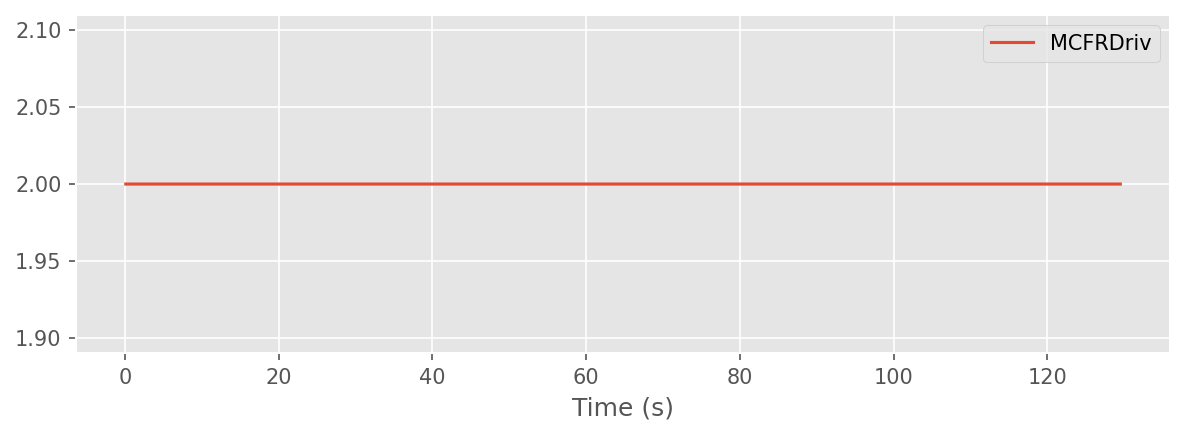

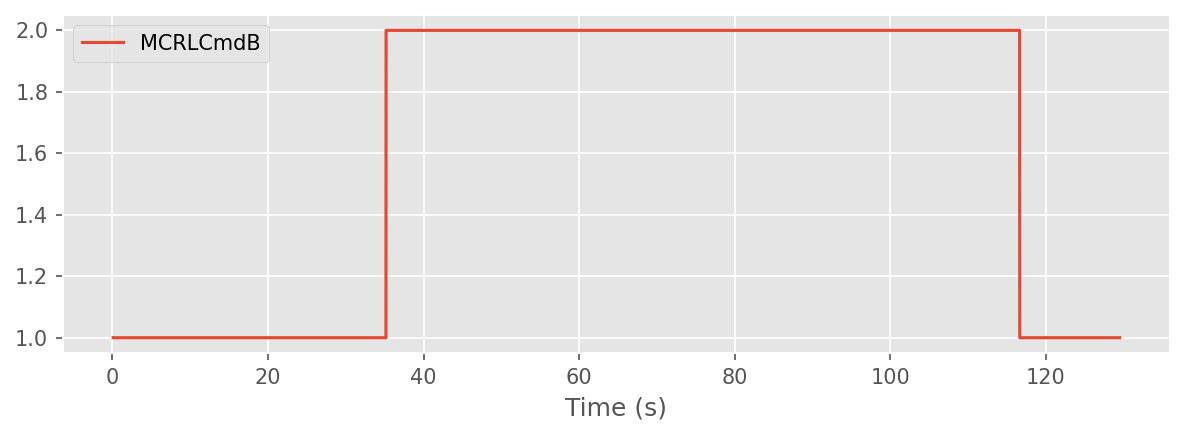

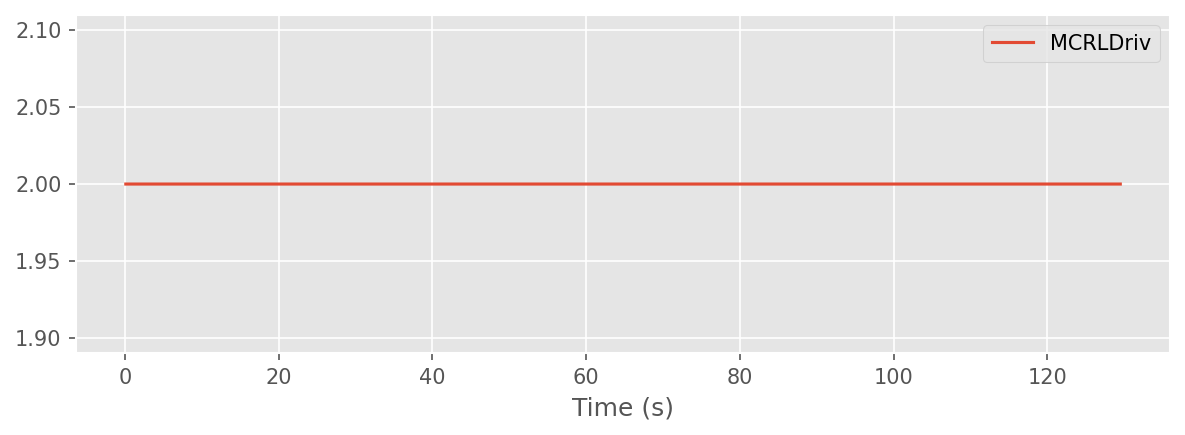

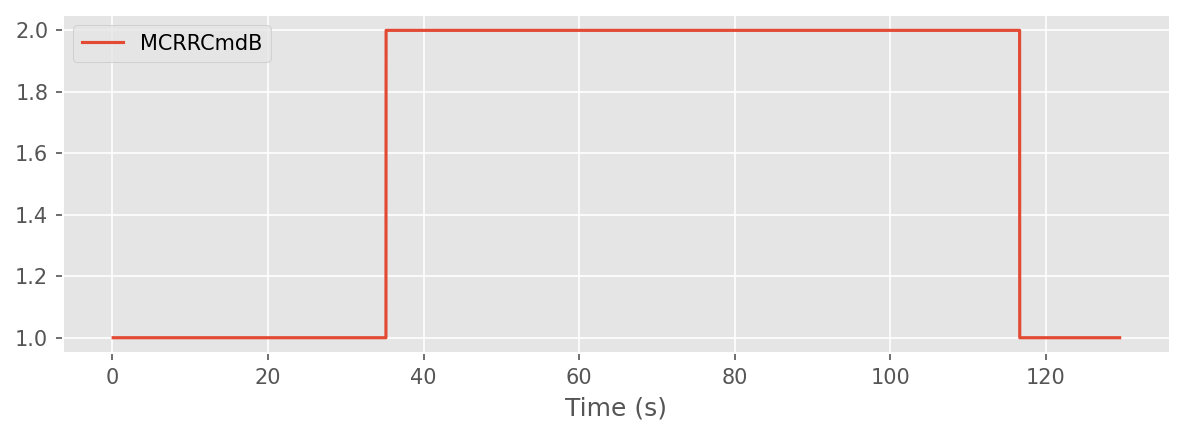

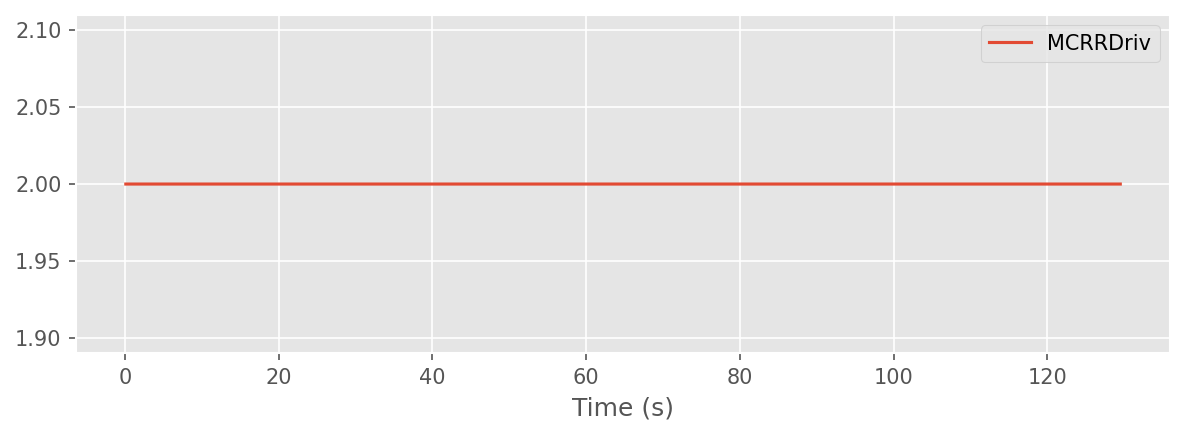

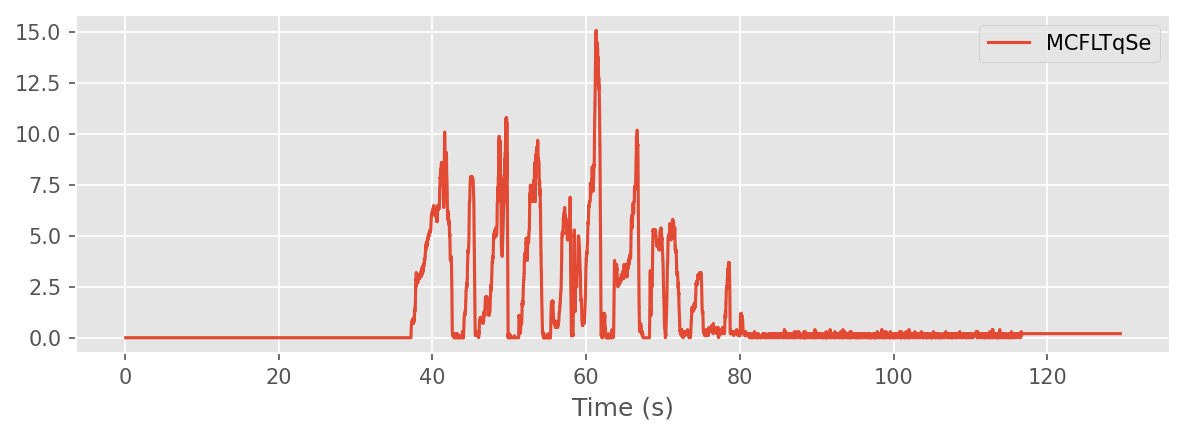

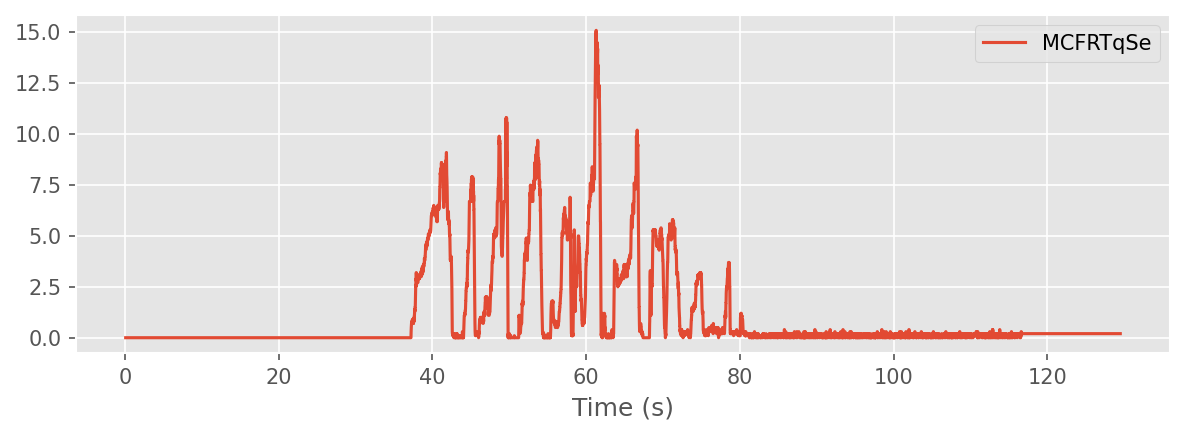

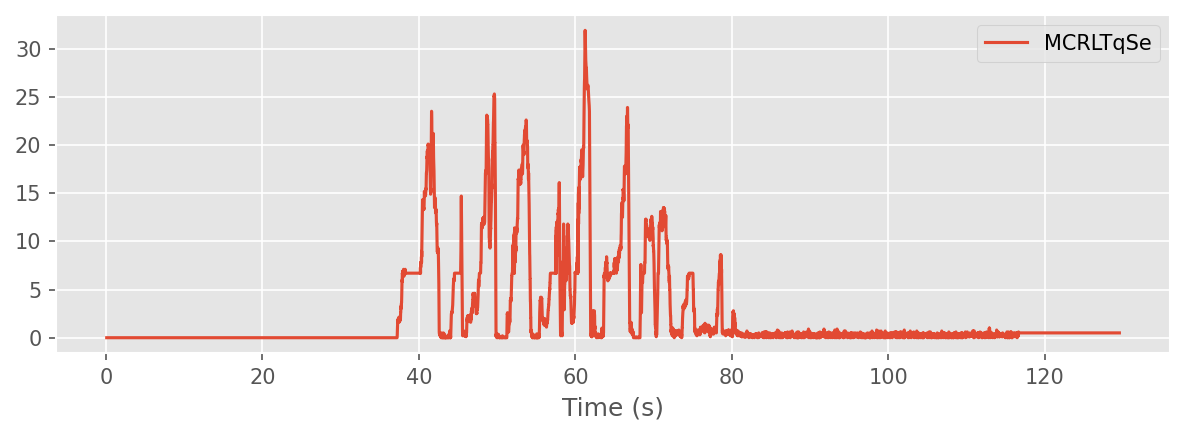

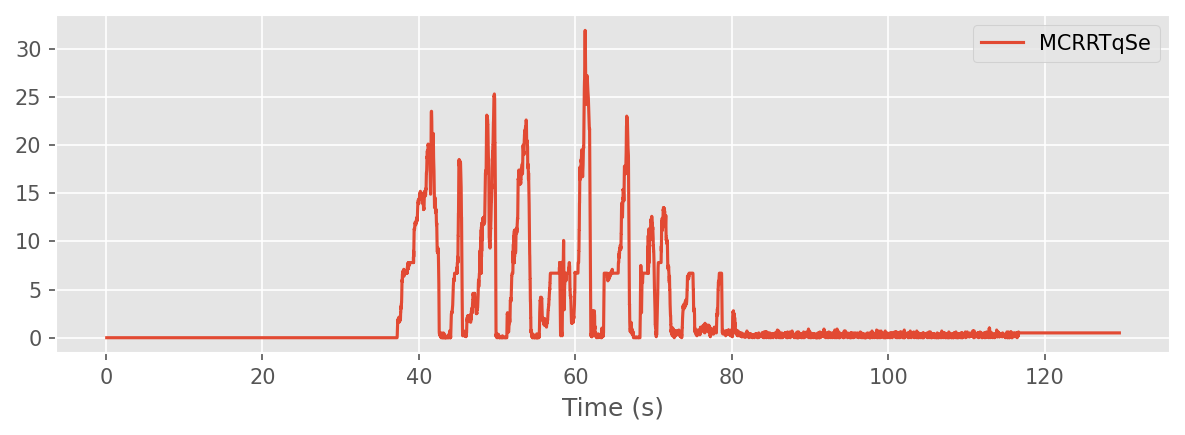

In [21]:
skip_keys = ['__header__', '__version__', '__globals__', 'header']
for key in mat_data1.keys():
    if key in skip_keys:
        continue
    vars = [key]
    plot_value(
        mat_data = mat_data1,
        vars = vars,
    )